In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy
from pycaret.regression import *

# Data Collection

In [2]:
data = pd.read_csv("/home/datahagward/Downloads/Netflix Revenue/Netflix Revenue.csv")
data.head()

,Date,Global Revenue,UACN Revenue,EMEA Revenue,LATM Revenue,APAC Revenue,UACN Members,EMEA Members,LATM Members,APAC Members,...,EMEA RPU,LATM RPU,APAC RPU,Domestic Members,Domestic Revenue,International Members,International Revenue,Domestic Free Trialers,Interntaional Free Trialers,Netflix Global Users
0,31-03-2012,869791000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,506665000.0,506665000.0,2409000.0,43425000.0,NaN,NaN,"50,90,74,000"
1,30-06-2012,889163000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,532705000.0,532705000.0,3024000.0,64973000.0,NaN,NaN,"53,57,29,000"
2,30-09-2012,905089000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,556027000.0,556027000.0,3689000.0,77744000.0,NaN,NaN,"55,97,16,000"
3,31-12-2012,945239000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,589471000.0,589471000.0,4892000.0,101400000.0,NaN,NaN,"59,43,63,000"
4,31-03-2013,1023961000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,638649000.0,638649000.0,6331000.0,142019000.0,NaN,NaN,"64,49,80,000"


In [3]:
data.shape

(45, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         45 non-null     object 
 1   Global Revenue               45 non-null     int64  
 2   UACN Revenue                 17 non-null     float64
 3   EMEA Revenue                 17 non-null     float64
 4   LATM Revenue                 17 non-null     float64
 5   APAC Revenue                 17 non-null     float64
 6   UACN Members                 17 non-null     float64
 7   EMEA  Members                17 non-null     float64
 8   LATM Members                 17 non-null     float64
 9   APAC Members                 17 non-null     float64
 10  UACN RPU                     17 non-null     float64
 11  EMEA RPU                     17 non-null     float64
 12  LATM  RPU                    17 non-null     float64
 13  APAC  RPU             

In [5]:
data.tail()

,Date,Global Revenue,UACN Revenue,EMEA Revenue,LATM Revenue,APAC Revenue,UACN Members,EMEA Members,LATM Members,APAC Members,...,EMEA RPU,LATM RPU,APAC RPU,Domestic Members,Domestic Revenue,International Members,International Revenue,Domestic Free Trialers,Interntaional Free Trialers,Netflix Global Users
40,31-03-2022,7867767000,3.350424e+09,2.561831e+09,9.989480e+08,916754000.0,74579000.0,73733000.0,39610000.0,33719000.0,...,11.56,8.37,9.21,NaN,NaN,NaN,NaN,NaN,NaN,"22,16,41,000"
41,30-06-2022,7970141000,3.537863e+09,2.457235e+09,1.030234e+09,907719000.0,73283000.0,72966000.0,39624000.0,34799000.0,...,11.17,8.67,8.83,NaN,NaN,NaN,NaN,NaN,NaN,"22,06,72,000"
42,30-09-2022,7925589000,3.601565e+09,2.375814e+09,1.023945e+09,889037000.0,73387000.0,73534000.0,39936000.0,36228000.0,...,10.81,8.58,8.34,NaN,NaN,NaN,NaN,NaN,NaN,"22,30,85,000"
43,31-12-2022,7852053000,3.594791e+09,2.350135e+09,1.016846e+09,856711000.0,74296000.0,76729000.0,41699000.0,38023000.0,...,10.43,8.30,7.69,NaN,NaN,NaN,NaN,NaN,NaN,"23,07,47,000"
44,31-03-2023,8161503000,3.608645e+09,2.517641e+09,1.070192e+09,933523000.0,74398000.0,77373000.0,41249000.0,39478000.0,...,10.89,8.60,8.03,NaN,NaN,NaN,NaN,NaN,NaN,"23,24,98,000"


In [6]:
data.columns

Index(['Date', 'Global Revenue', 'UACN Revenue', 'EMEA Revenue',
       'LATM Revenue', 'APAC Revenue', 'UACN Members', 'EMEA  Members',
       'LATM Members', 'APAC Members', 'UACN RPU', 'EMEA RPU', 'LATM  RPU',
       'APAC  RPU', 'Domestic Members', 'Domestic Revenue',
       'International Members', 'International Revenue',
       'Domestic Free Trialers', 'Interntaional Free Trialers',
       'Netflix Global Users'],
      dtype='object')

In [7]:
numerical_data =  [col for col in data.columns if data[col].dtypes!="O"]

In [8]:
data["Netflix Global Users"] = data["Netflix Global Users"].apply(lambda x: x.replace(',', ''))

In [9]:
data["Netflix Global Users"] = data["Netflix Global Users"].astype(float)

In [10]:
categorical_data = [col for col in data.columns if data[col].dtypes=="O"]
numerical_data = [col for col in data.columns if data[col].dtypes!="O"]

In [11]:
data.dtypes

Date                            object
Global Revenue                   int64
UACN Revenue                   float64
EMEA Revenue                   float64
LATM Revenue                   float64
APAC Revenue                   float64
UACN Members                   float64
EMEA  Members                  float64
LATM Members                   float64
APAC Members                   float64
UACN RPU                       float64
EMEA RPU                       float64
LATM  RPU                      float64
APAC  RPU                      float64
Domestic Members               float64
Domestic Revenue               float64
International Members          float64
International Revenue          float64
Domestic Free Trialers         float64
Interntaional Free Trialers    float64
Netflix Global Users           float64
dtype: object

In [12]:
categorical_data

['Date']

In [13]:
numerical_data

['Global Revenue',
 'UACN Revenue',
 'EMEA Revenue',
 'LATM Revenue',
 'APAC Revenue',
 'UACN Members',
 'EMEA  Members',
 'LATM Members',
 'APAC Members',
 'UACN RPU',
 'EMEA RPU',
 'LATM  RPU',
 'APAC  RPU',
 'Domestic Members',
 'Domestic Revenue',
 'International Members',
 'International Revenue',
 'Domestic Free Trialers',
 'Interntaional Free Trialers',
 'Netflix Global Users']

# Data Cleaning

In [14]:
data.isnull().sum()

Date                            0
Global Revenue                  0
UACN Revenue                   28
EMEA Revenue                   28
LATM Revenue                   28
APAC Revenue                   28
UACN Members                   28
EMEA  Members                  28
LATM Members                   28
APAC Members                   28
UACN RPU                       28
EMEA RPU                       28
LATM  RPU                      28
APAC  RPU                      28
Domestic Members               17
Domestic Revenue               17
International Members          17
International Revenue          17
Domestic Free Trialers         33
Interntaional Free Trialers    33
Netflix Global Users            0
dtype: int64

In [15]:
for i in numerical_data:
    data[i].fillna(value=data[i].mean(),inplace=True)

In [16]:
data["Global Revenue"] = data["Global Revenue"].astype(float)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         45 non-null     object 
 1   Global Revenue               45 non-null     float64
 2   UACN Revenue                 45 non-null     float64
 3   EMEA Revenue                 45 non-null     float64
 4   LATM Revenue                 45 non-null     float64
 5   APAC Revenue                 45 non-null     float64
 6   UACN Members                 45 non-null     float64
 7   EMEA  Members                45 non-null     float64
 8   LATM Members                 45 non-null     float64
 9   APAC Members                 45 non-null     float64
 10  UACN RPU                     45 non-null     float64
 11  EMEA RPU                     45 non-null     float64
 12  LATM  RPU                    45 non-null     float64
 13  APAC  RPU             

In [18]:
data.describe()

,Global Revenue,UACN Revenue,EMEA Revenue,LATM Revenue,APAC Revenue,UACN Members,EMEA Members,LATM Members,APAC Members,UACN RPU,EMEA RPU,LATM RPU,APAC RPU,Domestic Members,Domestic Revenue,International Members,International Revenue,Domestic Free Trialers,Interntaional Free Trialers,Netflix Global Users
count,4.500000e+01,4.500000e+01,4.500000e+01,4.500000e+01,4.500000e+01,4.500000e+01,4.500000e+01,4.500000e+01,4.500000e+01,45.000000,45.00000,45.000000,45.000000,4.500000e+01,4.500000e+01,4.500000e+01,4.500000e+01,4.500000e+01,4.500000e+01,4.500000e+01
mean,3.804736e+09,3.068941e+09,2.075164e+09,8.629001e+08,6.830686e+08,7.207747e+07,6.418447e+07,3.635882e+07,2.628129e+07,14.200588,10.91000,8.004706,9.050000,1.084327e+09,1.084327e+09,2.956664e+07,7.265650e+08,1.498000e+06,3.873833e+06,7.682303e+08
std,2.559212e+09,2.538125e+08,2.770293e+08,8.138500e+07,1.329147e+08,1.886902e+06,6.931248e+06,2.788466e+06,5.390422e+06,0.864082,0.32808,0.306410,0.339116,3.448939e+08,3.448939e+08,1.858419e+07,5.048105e+08,1.494808e+05,7.175760e+05,5.773021e+08
min,8.697910e+08,2.256851e+09,1.233379e+09,6.304720e+08,3.196020e+08,6.650100e+07,4.254200e+07,2.754700e+07,1.214100e+07,11.450000,10.13000,7.120000,7.690000,5.066650e+08,5.066650e+08,2.409000e+06,4.342500e+07,1.018000e+06,2.156000e+06,1.488630e+08
25%,1.484728e+09,3.068941e+09,2.075164e+09,8.629001e+08,6.830686e+08,7.207747e+07,6.418447e+07,3.635882e+07,2.628129e+07,14.200588,10.91000,8.004706,9.050000,9.174420e+08,9.174420e+08,1.677800e+07,3.877970e+08,1.498000e+06,3.873833e+06,2.206720e+08
50%,2.984859e+09,3.068941e+09,2.075164e+09,8.629001e+08,6.830686e+08,7.207747e+07,6.418447e+07,3.635882e+07,2.628129e+07,14.200588,10.91000,8.004706,9.050000,1.084327e+09,1.084327e+09,2.956664e+07,7.265650e+08,1.498000e+06,3.873833e+06,6.781030e+08
75%,6.148286e+09,3.068941e+09,2.075164e+09,8.629001e+08,6.830686e+08,7.290400e+07,6.418447e+07,3.635882e+07,2.628129e+07,14.200588,10.91000,8.004706,9.050000,1.105933e+09,1.105933e+09,3.199300e+07,7.265650e+08,1.498000e+06,3.873833e+06,1.133371e+09
max,8.161503e+09,3.608645e+09,2.561831e+09,1.070192e+09,9.335230e+08,7.521500e+07,7.737300e+07,4.169900e+07,3.947800e+07,16.370000,11.66000,8.670000,9.740000,1.996092e+09,1.996092e+09,8.077300e+07,2.105592e+09,2.065000e+06,7.131000e+06,2.076865e+09


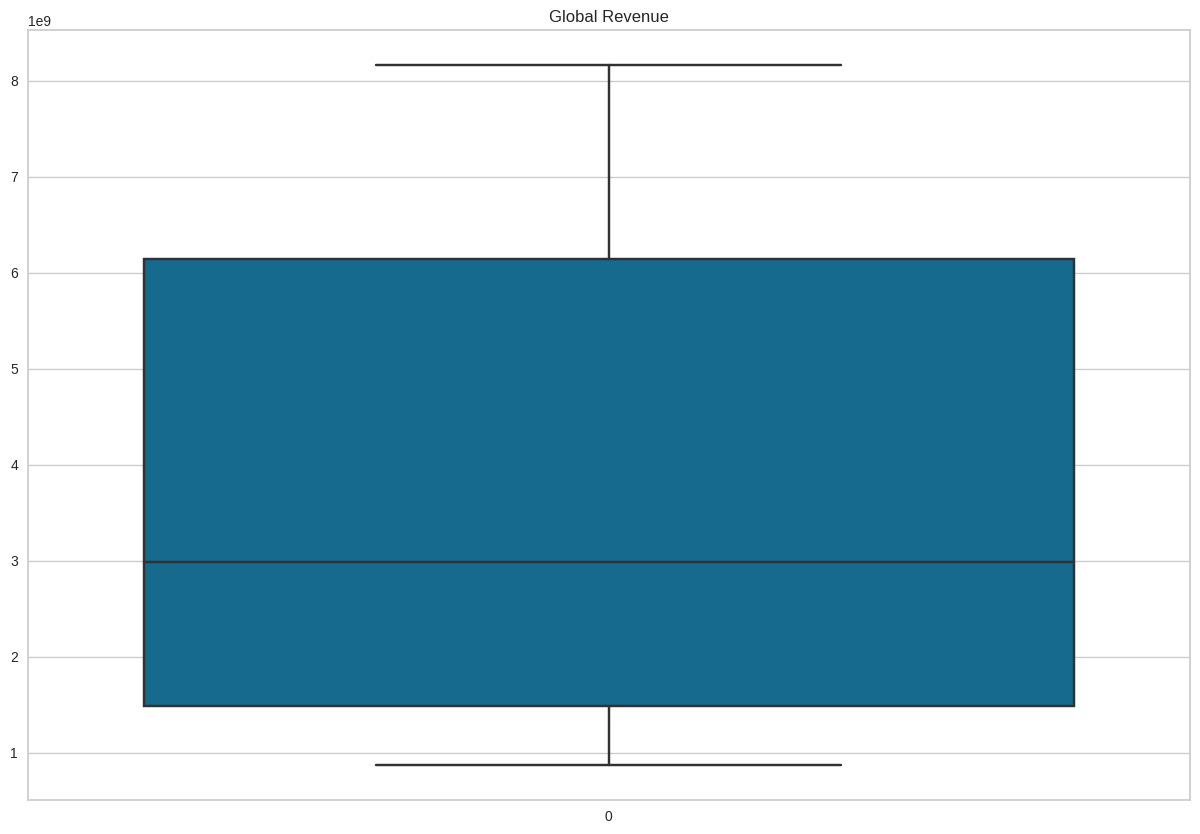

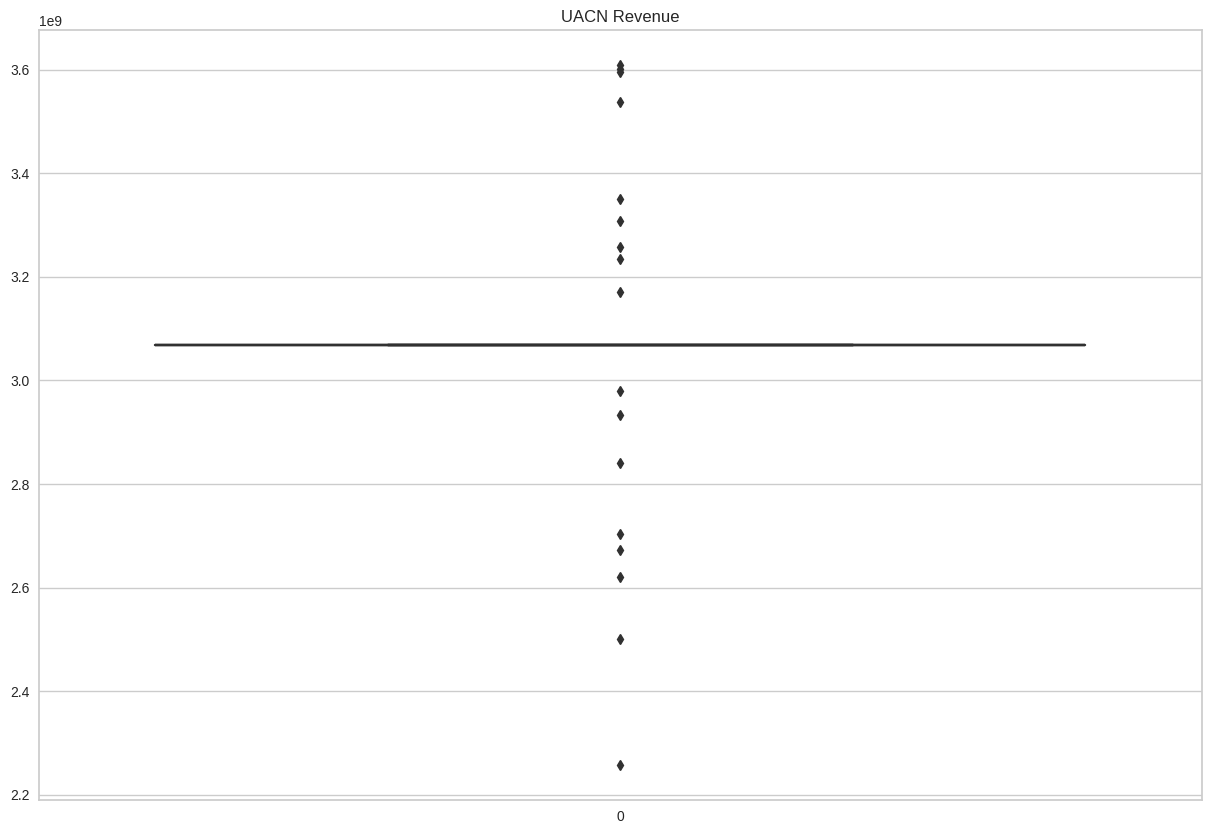

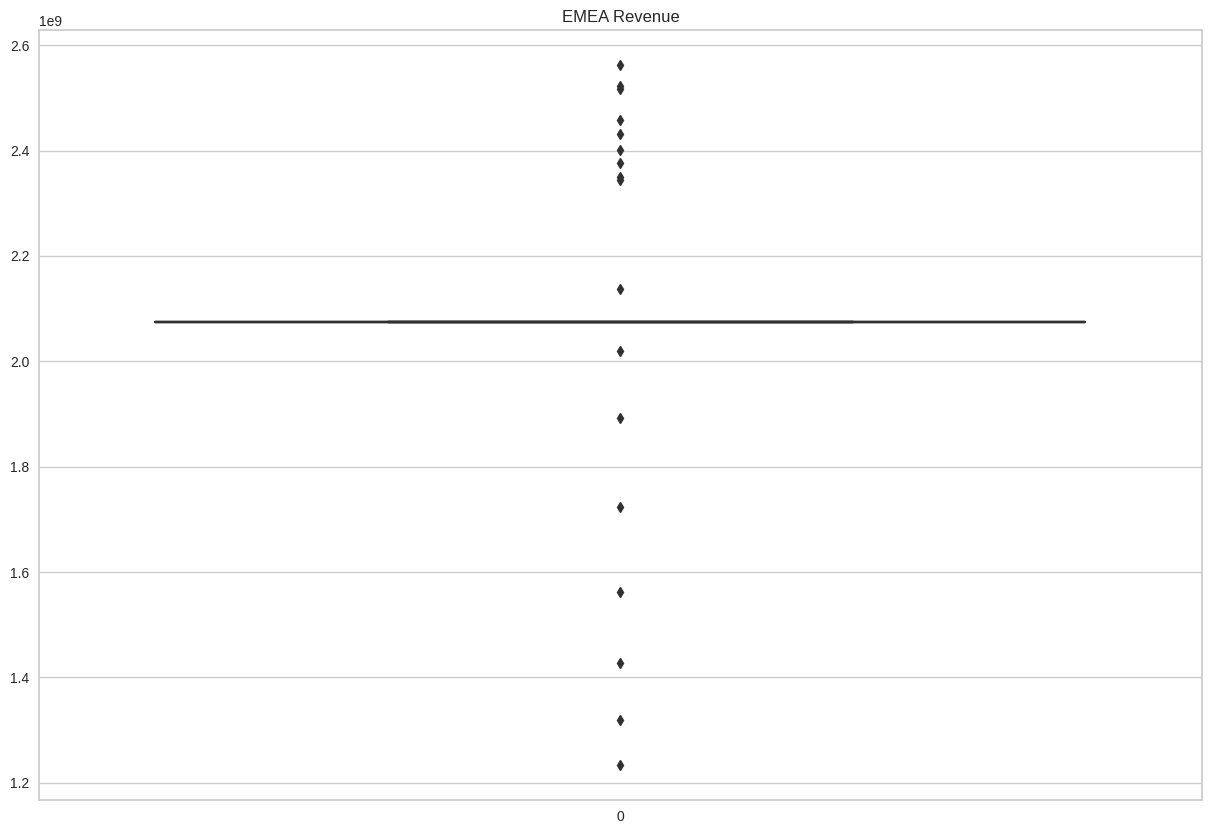

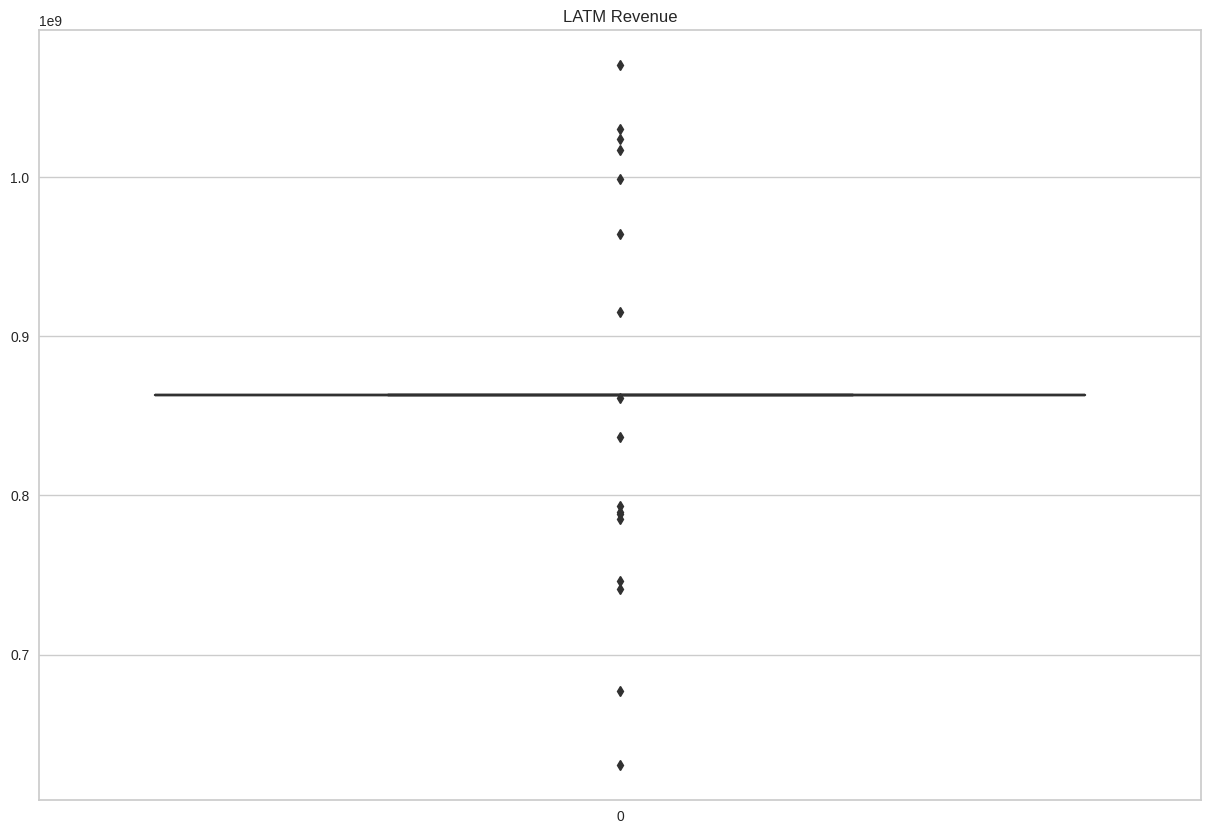

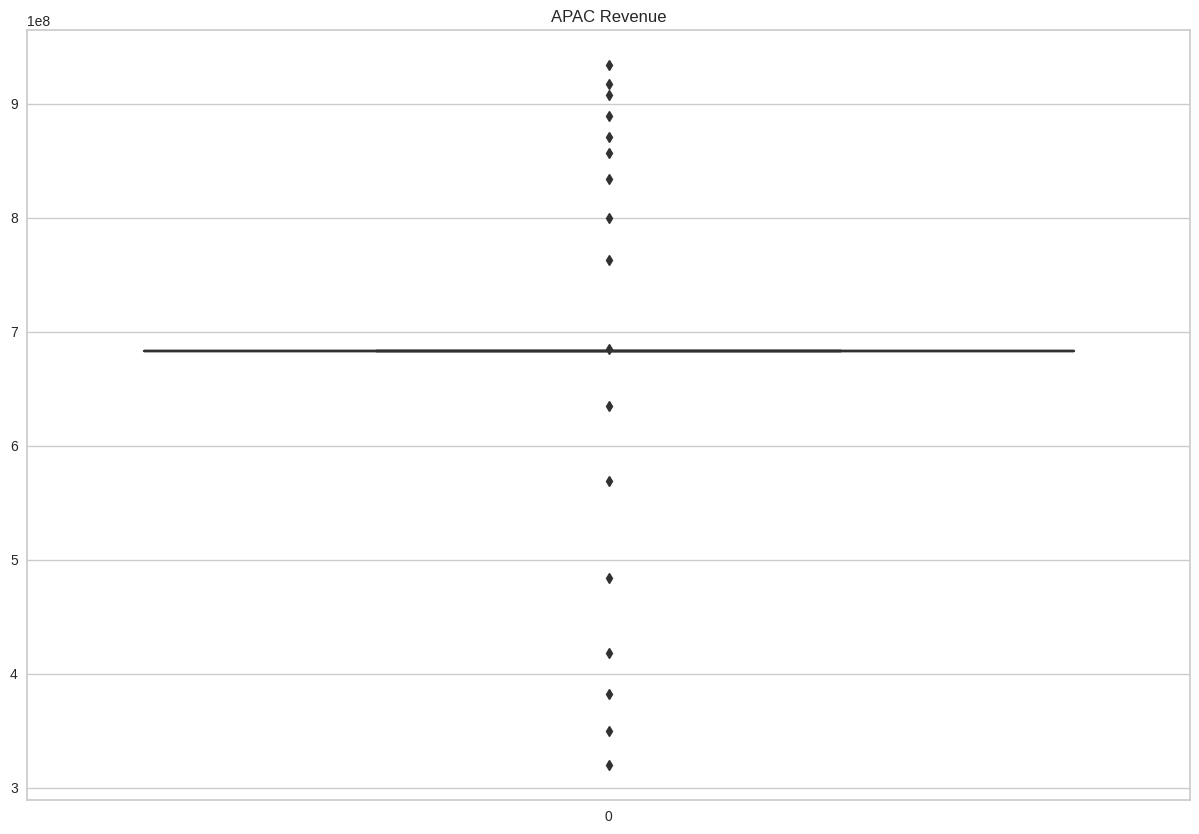

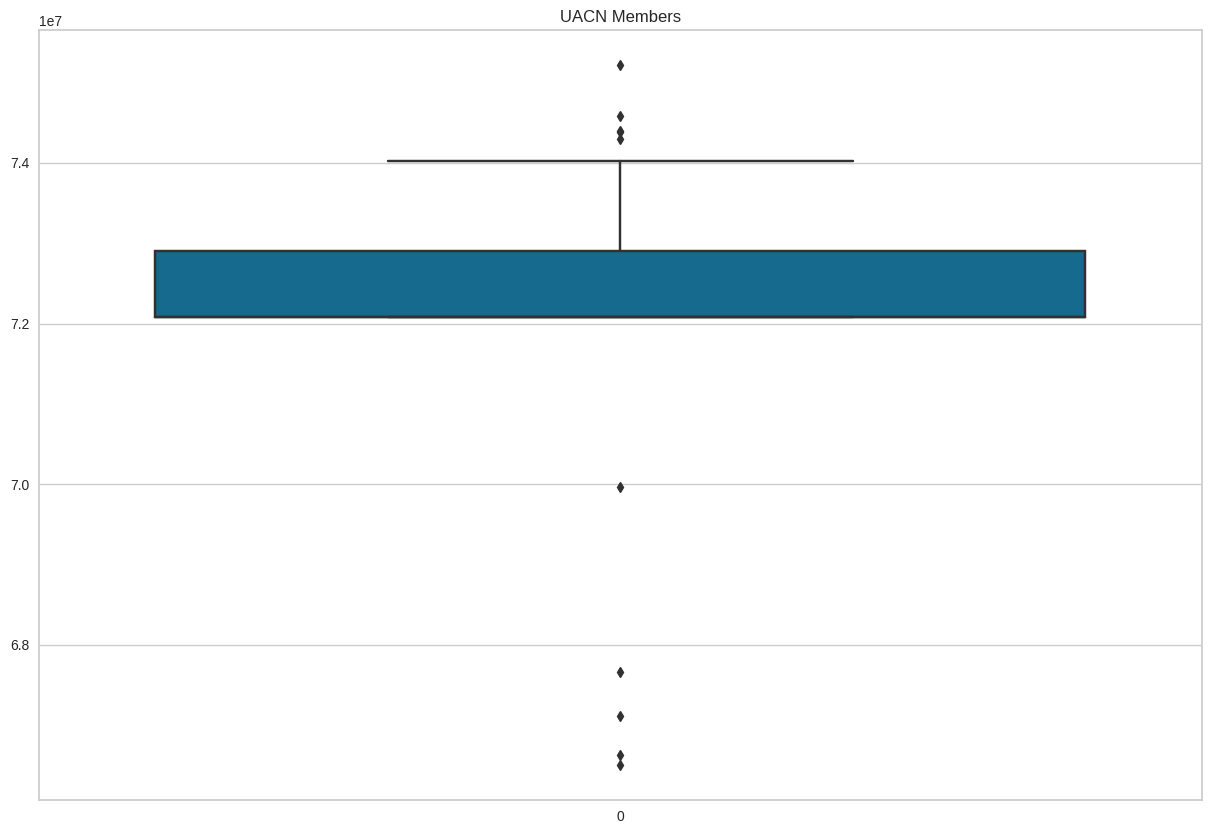

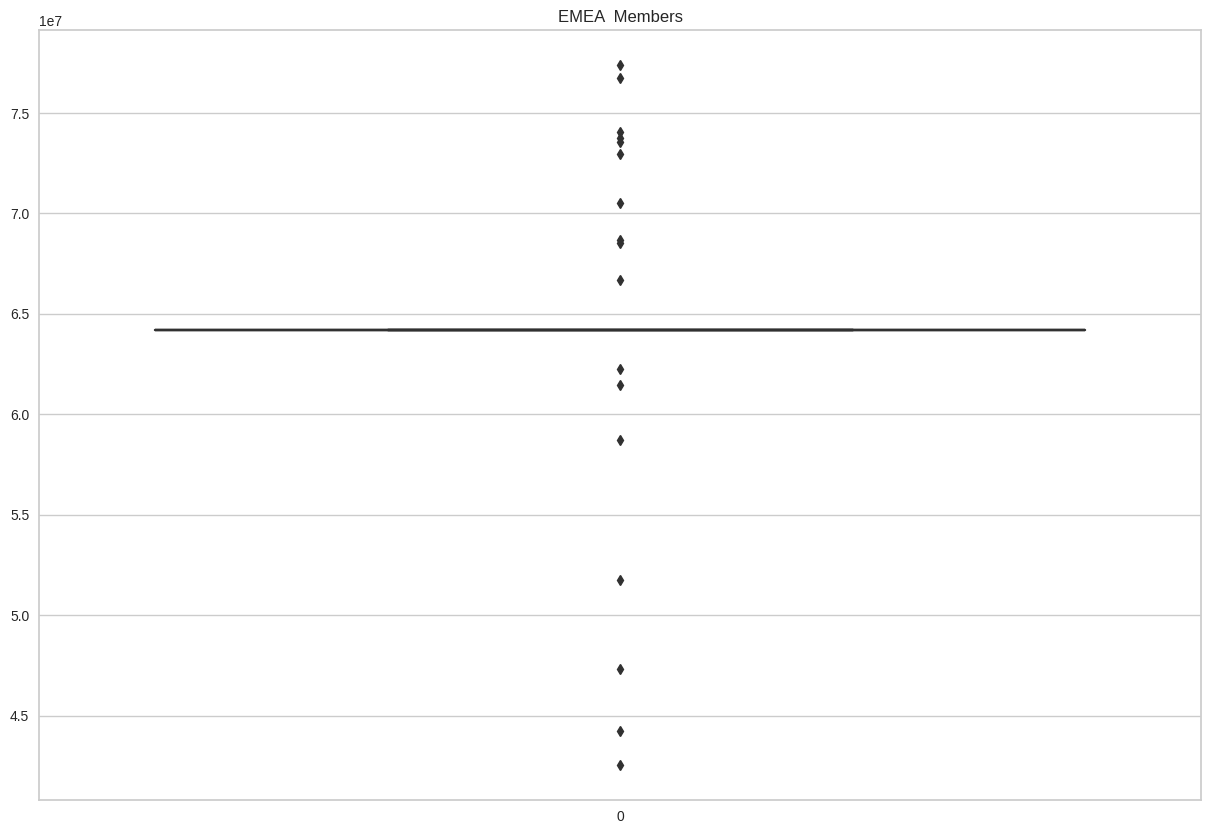

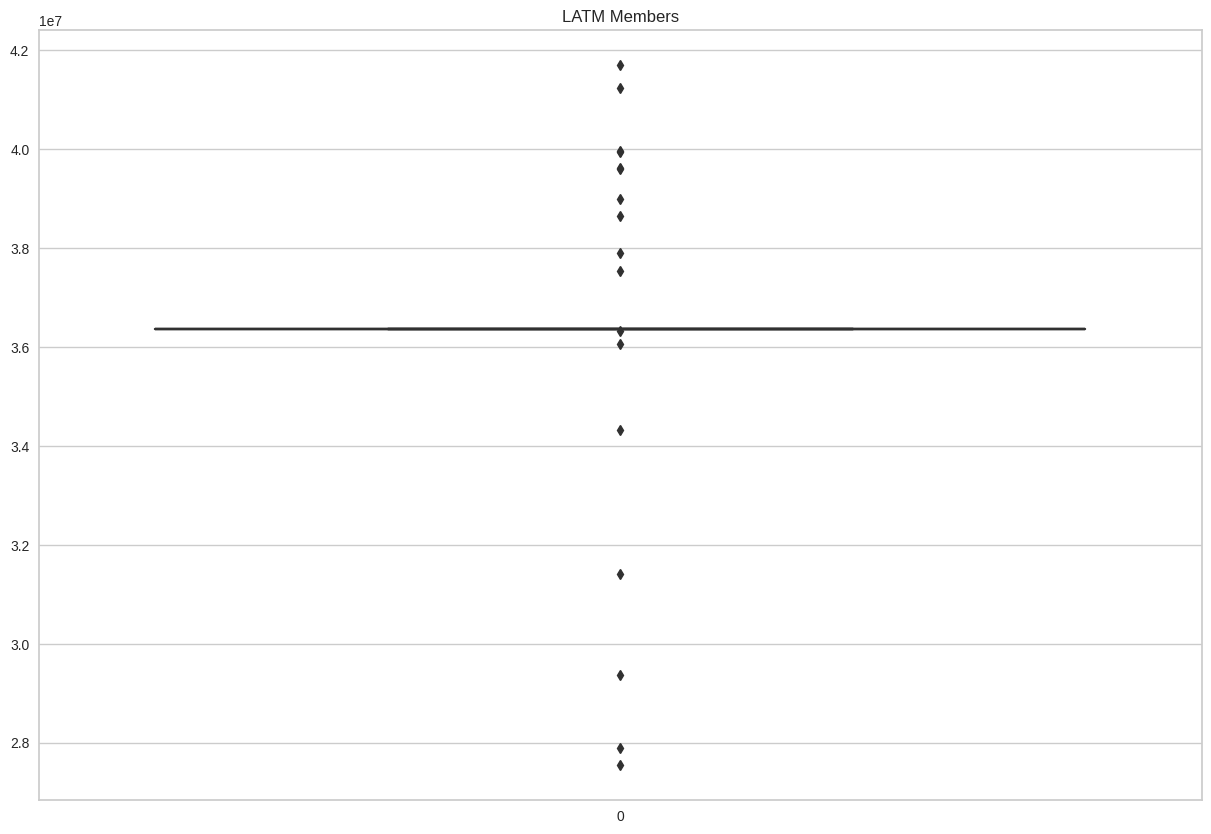

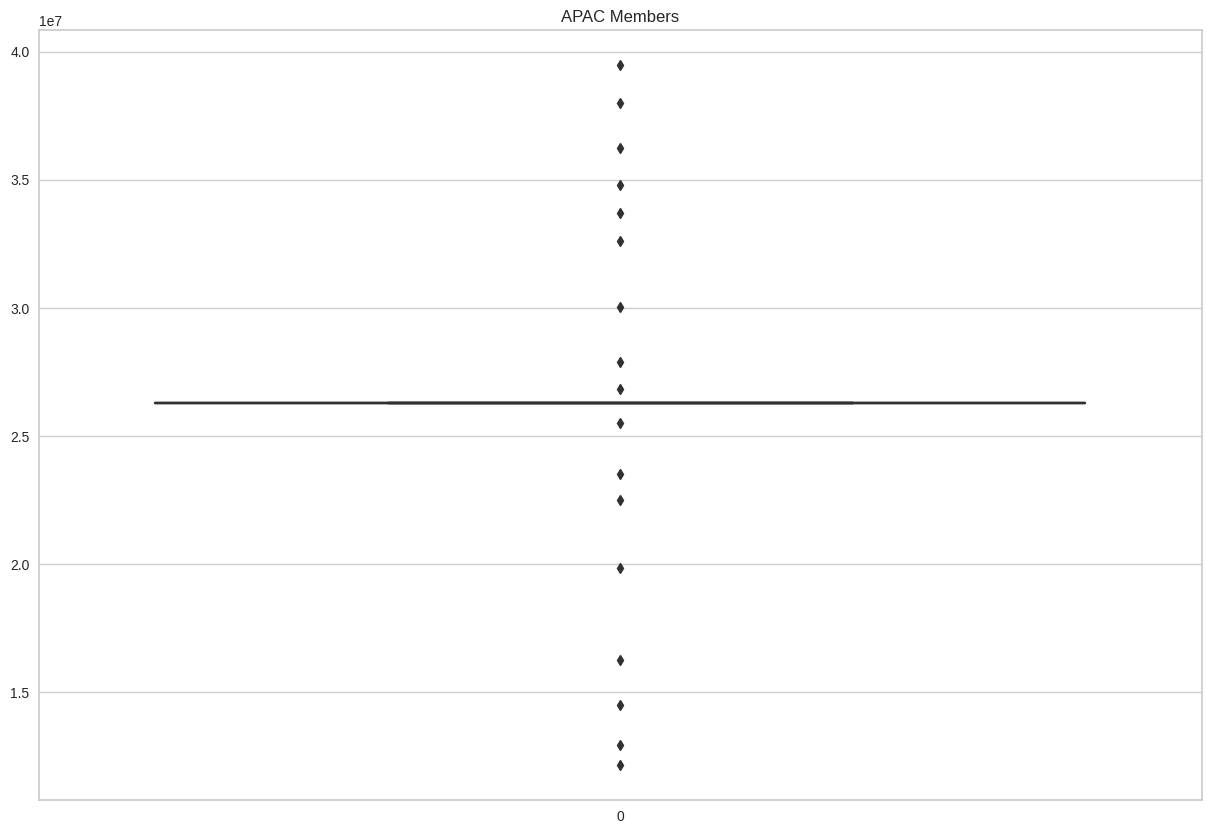

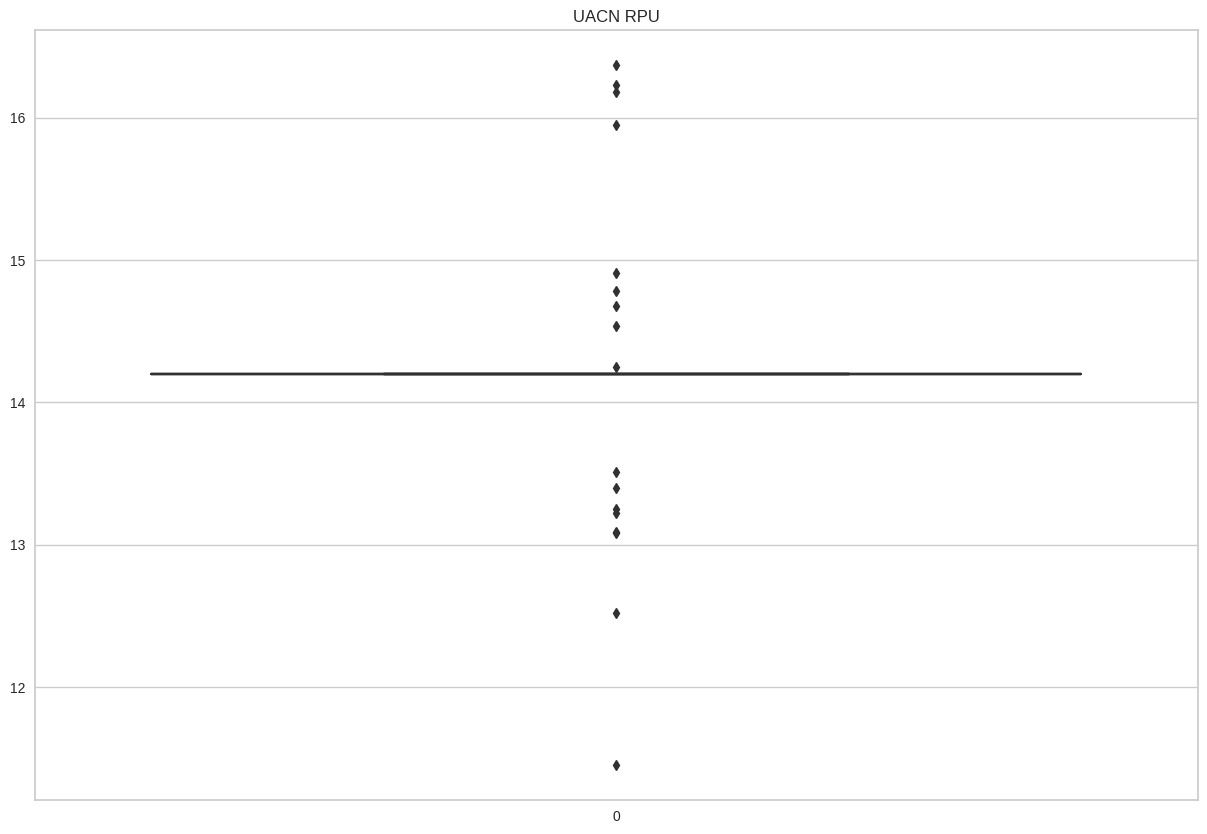

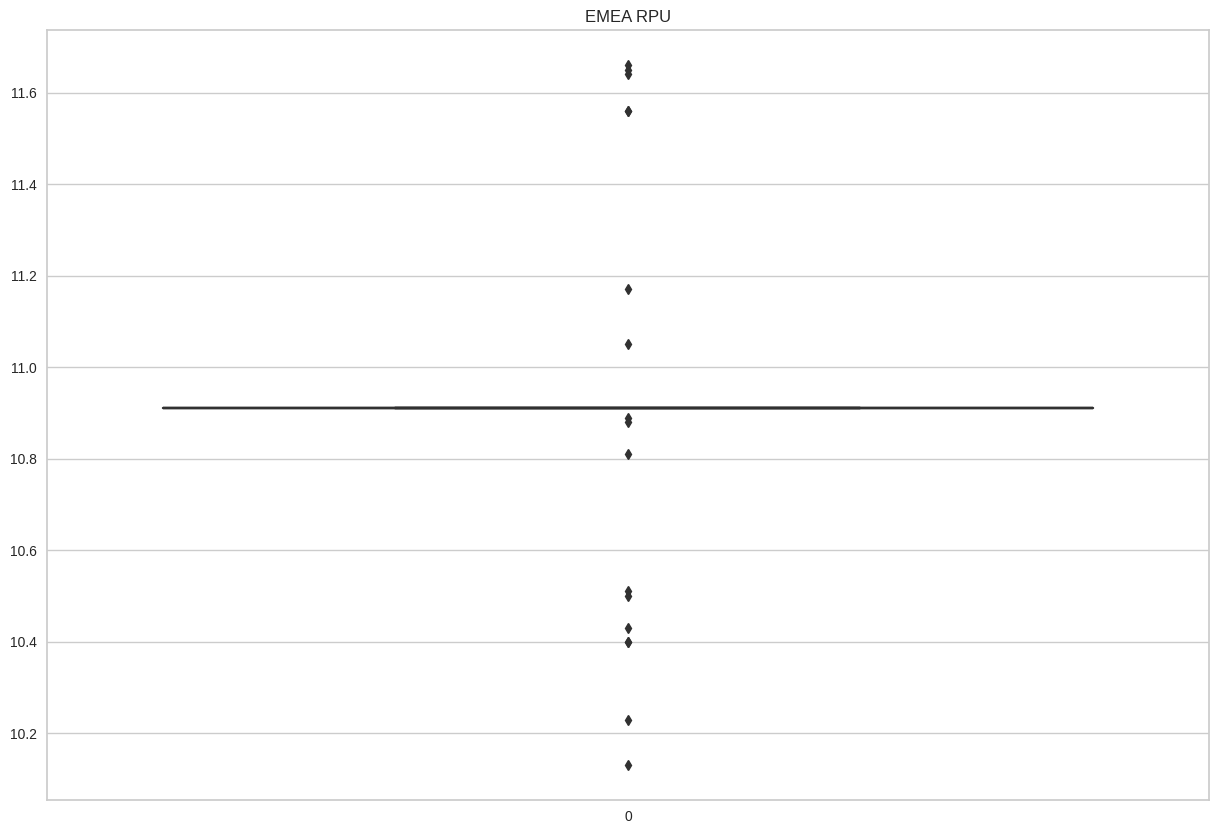

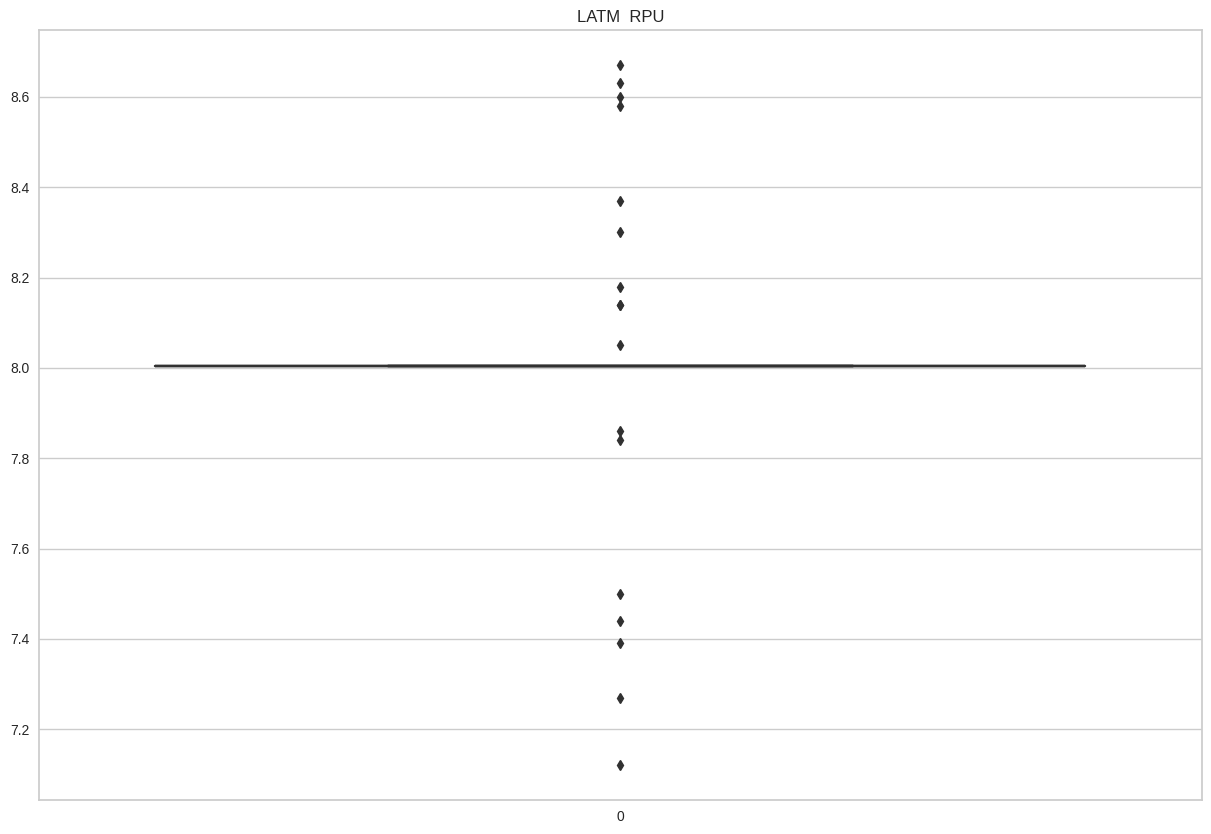

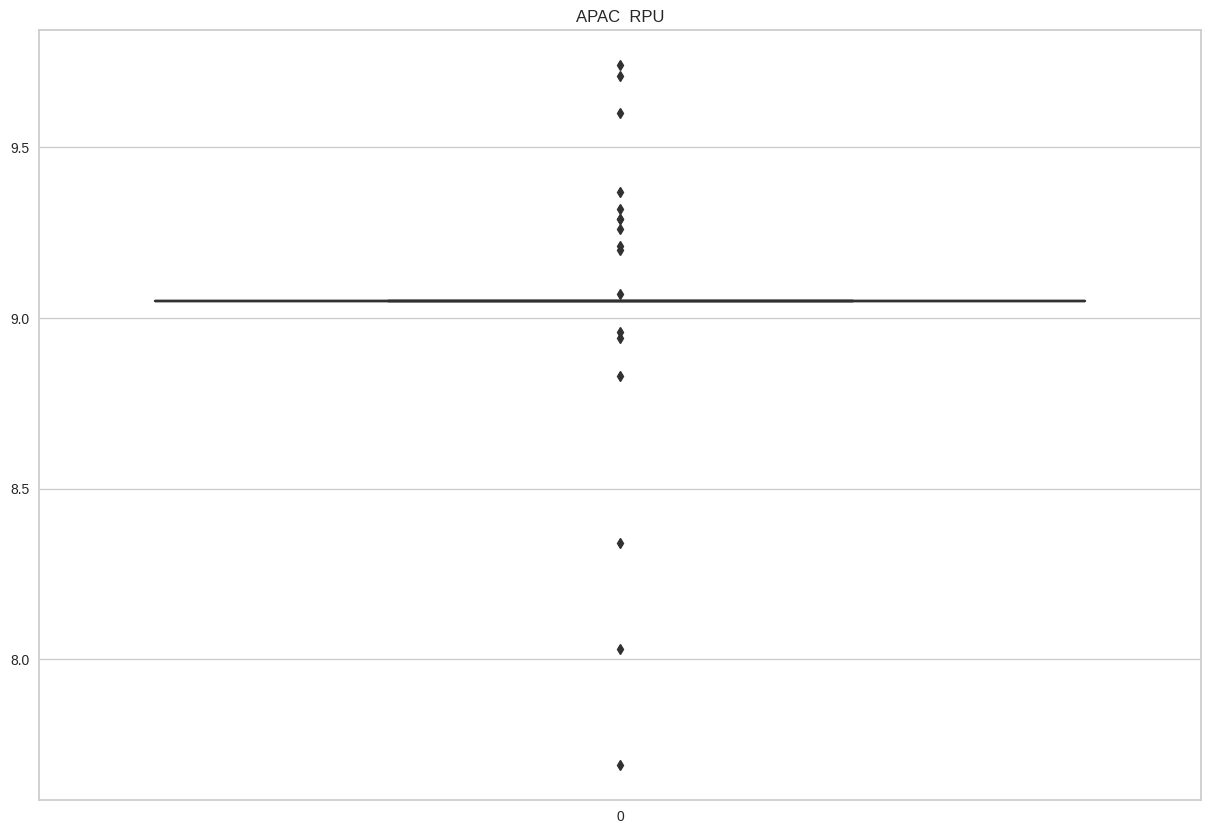

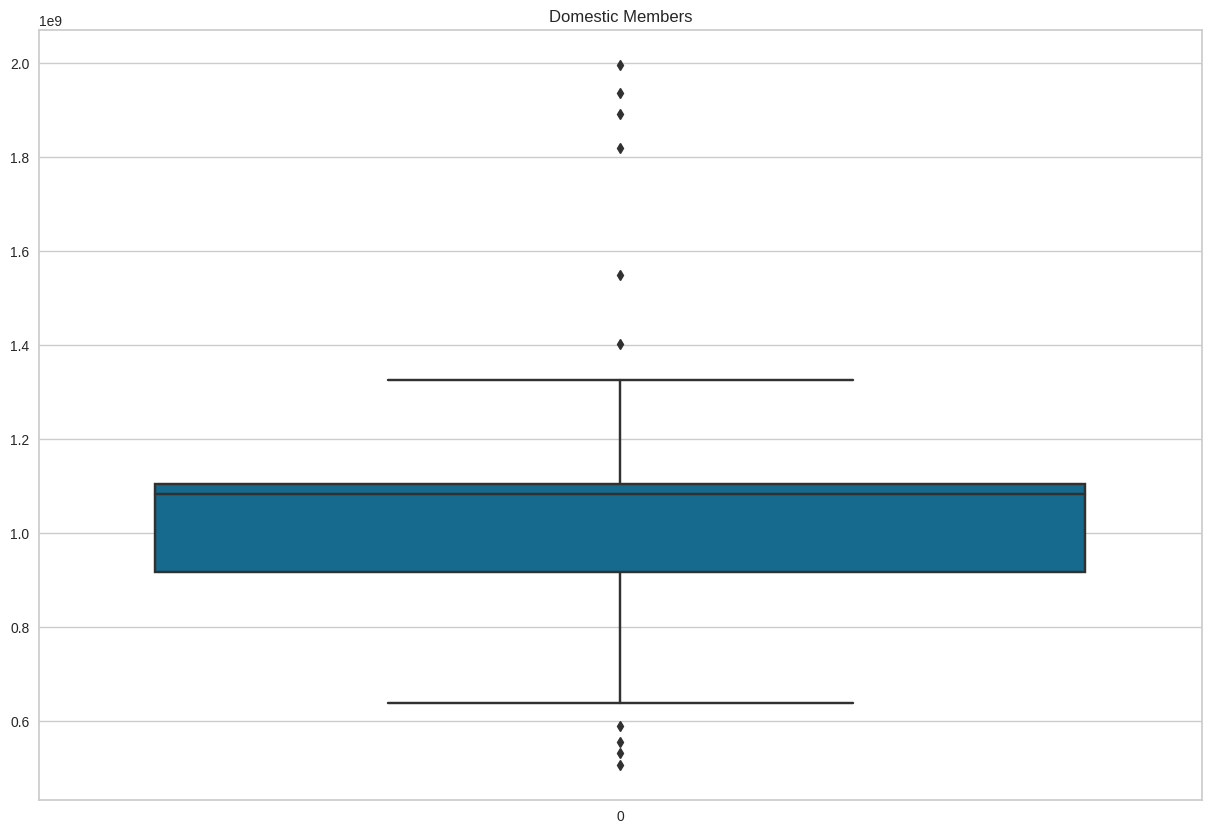

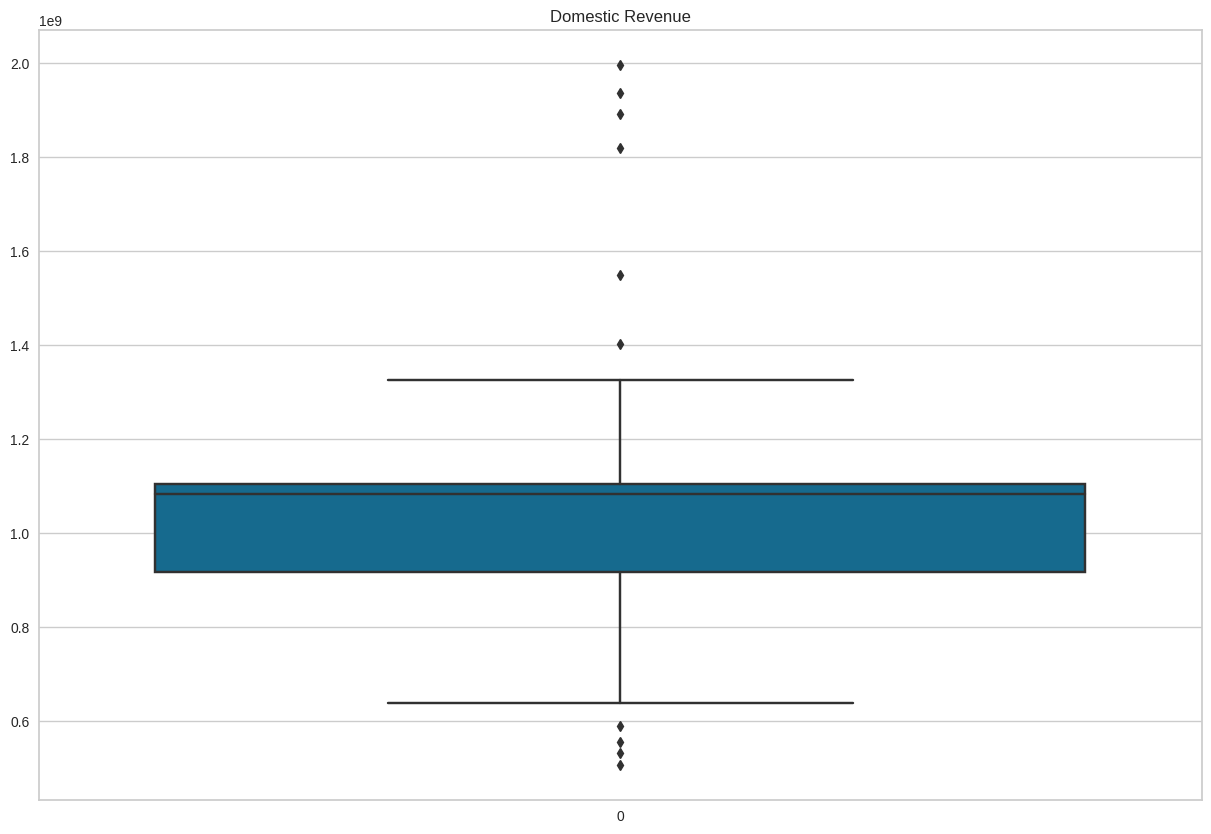

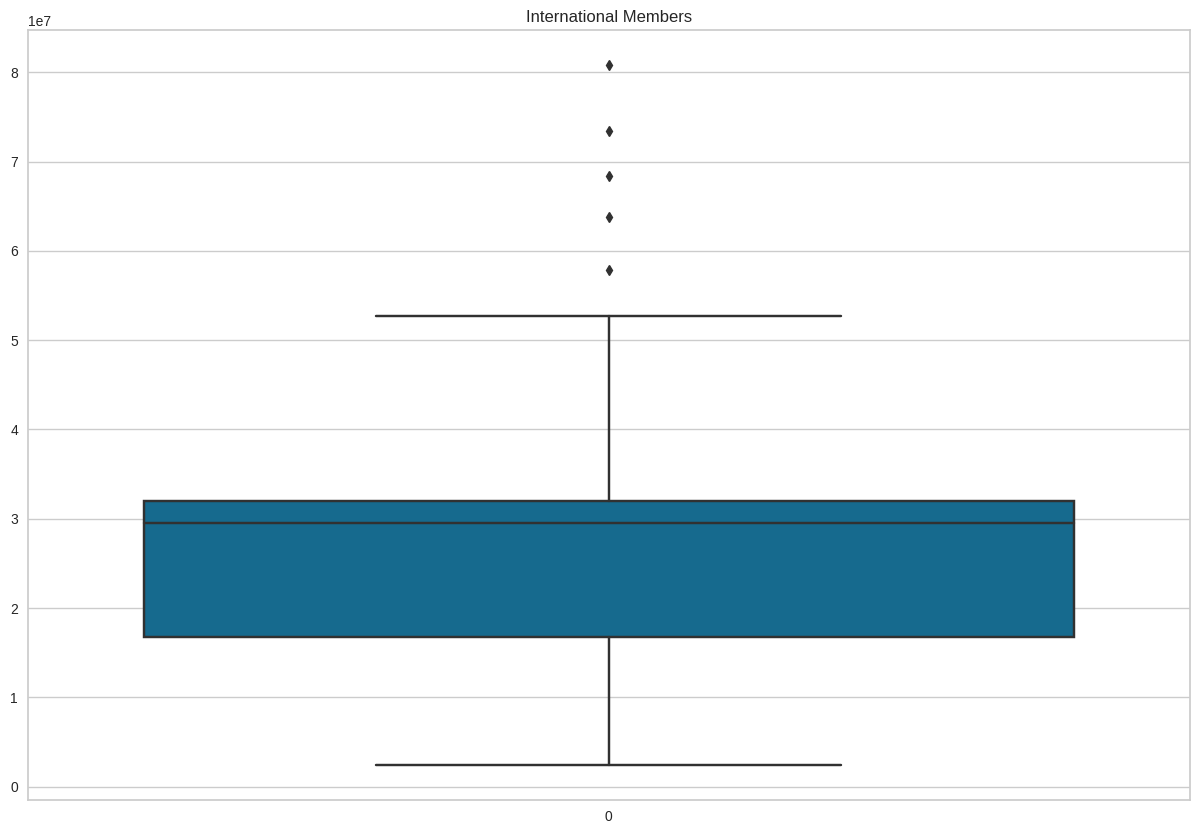

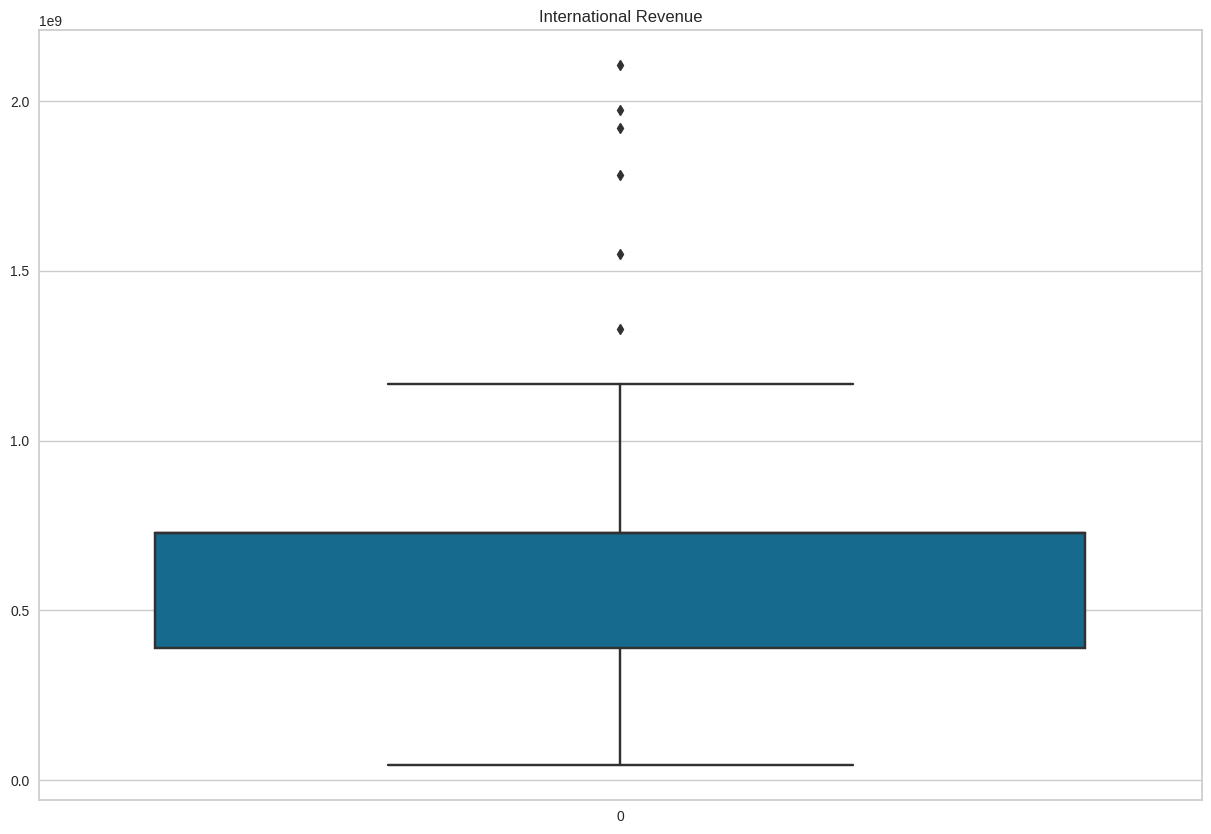

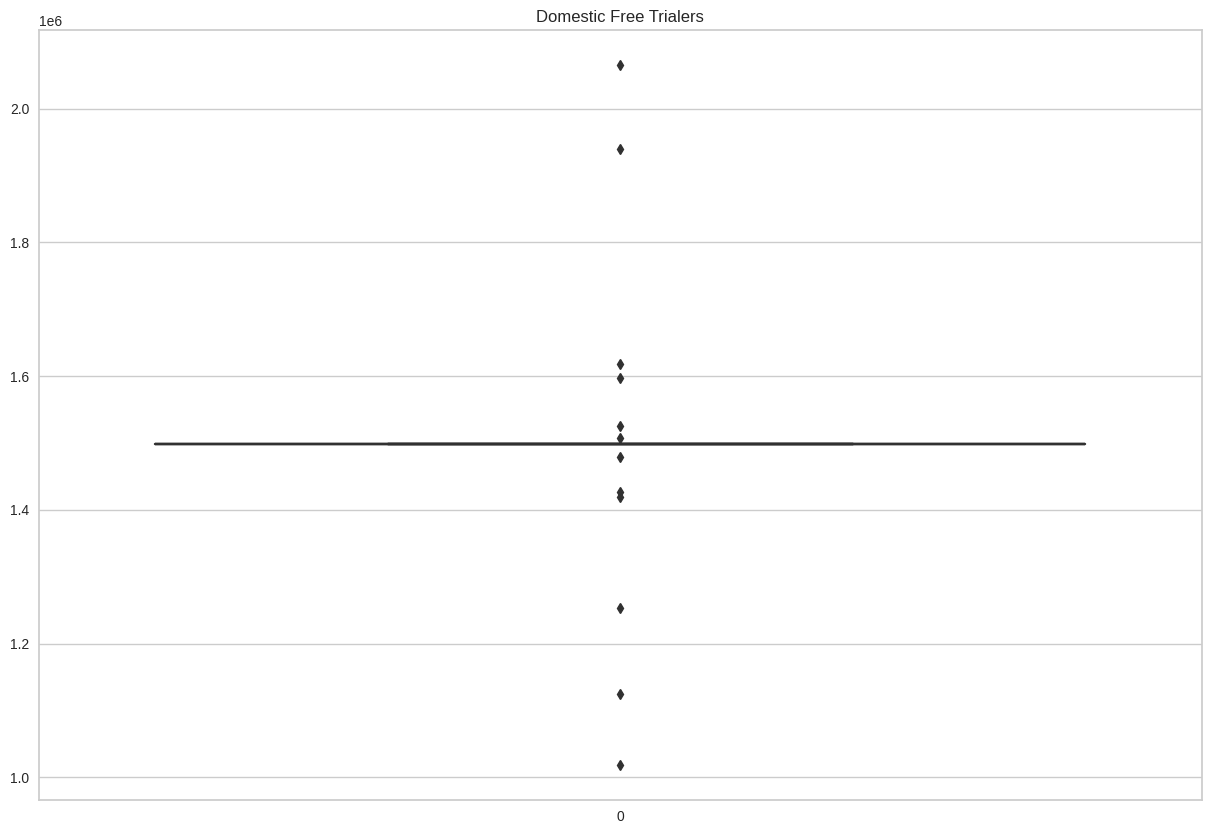

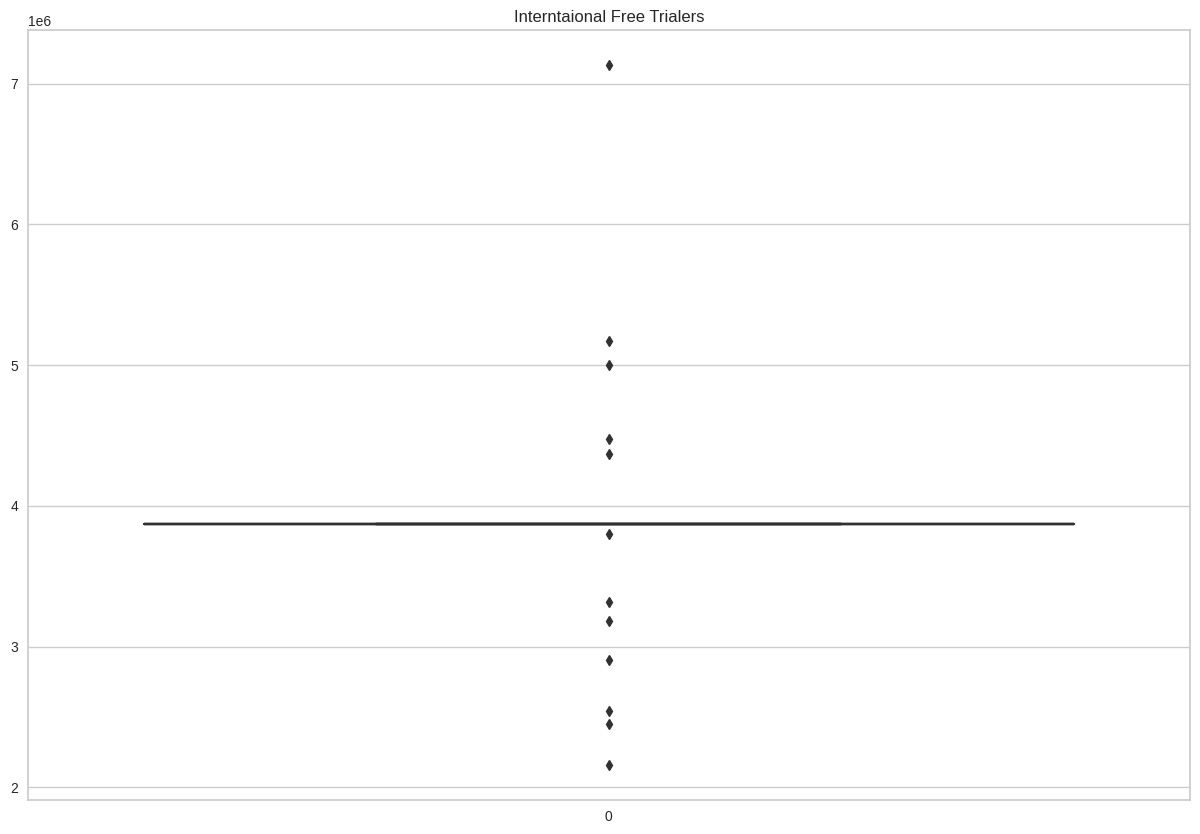

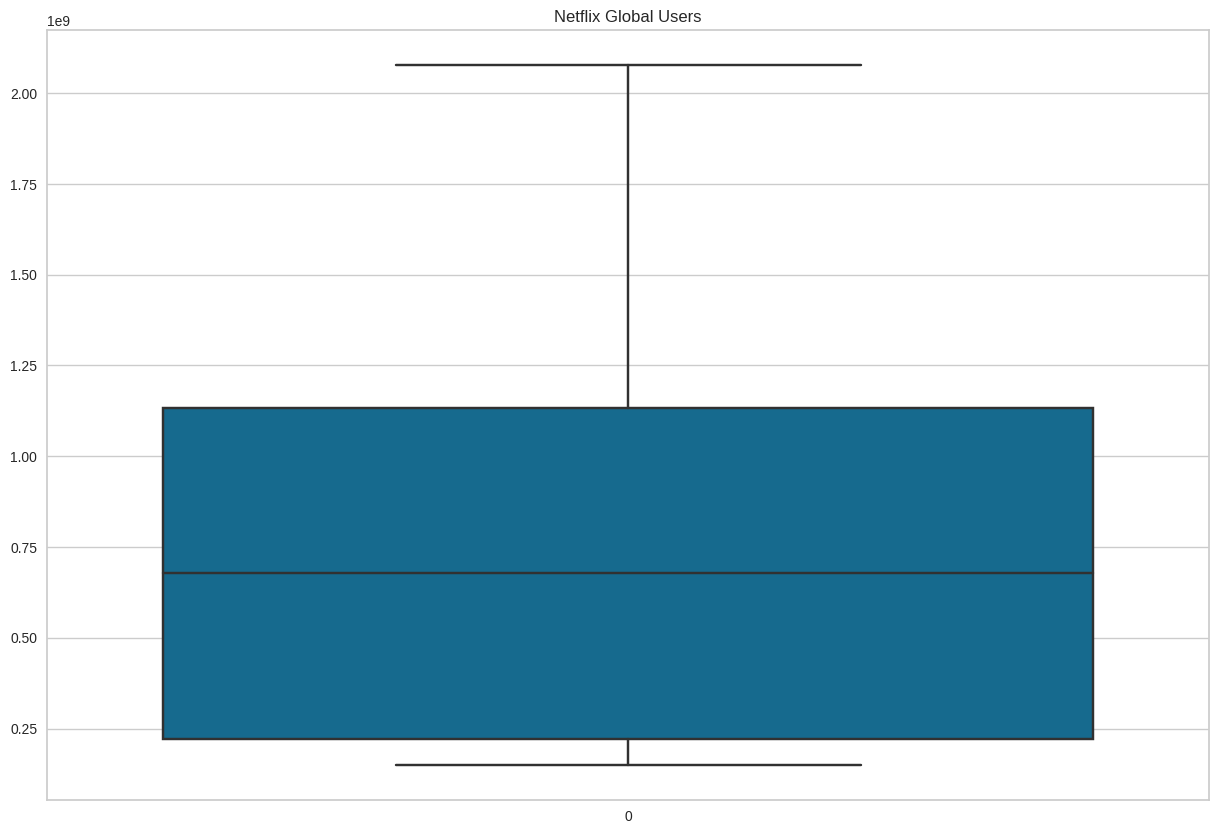

In [21]:
for i in data.drop(["Date"],axis=1).columns:
    plt.figure(figsize=(15,10))
    sns.boxplot(data[i])
    plt.title(f"{i}")
    plt.show()

In [22]:
data.corr()

,Global Revenue,UACN Revenue,EMEA Revenue,LATM Revenue,APAC Revenue,UACN Members,EMEA Members,LATM Members,APAC Members,UACN RPU,EMEA RPU,LATM RPU,APAC RPU,Domestic Members,Domestic Revenue,International Members,International Revenue,Domestic Free Trialers,Interntaional Free Trialers,Netflix Global Users
Global Revenue,1.000000,2.779179e-01,2.770346e-01,2.691795e-01,2.810330e-01,2.567151e-01,2.775461e-01,2.739255e-01,2.769444e-01,2.648514e-01,1.972793e-01,6.105663e-02,-1.055059e-01,0.310353,0.310353,0.318433,3.188606e-01,0.102380,1.376902e-01,-0.499270
UACN Revenue,0.277918,1.000000e+00,9.356459e-01,9.695396e-01,9.688413e-01,8.491947e-01,9.593827e-01,9.460429e-01,9.841145e-01,9.819238e-01,5.863317e-01,3.084617e-01,-4.914377e-01,0.000000,0.000000,0.000000,-1.979548e-17,0.000000,-5.439846e-17,0.028053
EMEA Revenue,0.277035,9.356459e-01,1.000000e+00,8.886186e-01,9.873115e-01,9.549151e-01,9.780128e-01,9.699217e-01,9.380693e-01,8.577687e-01,8.043354e-01,6.551019e-02,-2.191000e-01,0.000000,0.000000,0.000000,-1.866493e-17,0.000000,-5.129166e-17,0.028307
LATM Revenue,0.269179,9.695396e-01,8.886186e-01,1.000000e+00,9.365240e-01,7.725253e-01,9.232669e-01,8.995281e-01,9.727608e-01,9.715113e-01,5.127519e-01,4.766809e-01,-5.647154e-01,0.000000,0.000000,0.000000,-1.951352e-17,0.000000,-5.362363e-17,0.027038
APAC Revenue,0.281033,9.688413e-01,9.873115e-01,9.365240e-01,1.000000e+00,9.204938e-01,9.780287e-01,9.642094e-01,9.733665e-01,9.108229e-01,7.326259e-01,1.781648e-01,-3.243441e-01,0.000000,0.000000,0.000000,-1.938842e-17,0.000000,-5.327983e-17,0.028497
UACN Members,0.256715,8.491947e-01,9.549151e-01,7.725253e-01,9.204938e-01,1.000000e+00,9.491325e-01,9.593412e-01,8.728681e-01,7.391922e-01,7.580613e-01,-1.727274e-01,-1.841472e-01,0.000000,0.000000,0.000000,-1.708616e-17,0.000000,-4.695318e-17,0.027448
EMEA Members,0.277546,9.593827e-01,9.780128e-01,9.232669e-01,9.780287e-01,9.491325e-01,1.000000e+00,9.961707e-01,9.735022e-01,8.993321e-01,6.741614e-01,1.112649e-01,-3.946789e-01,0.000000,0.000000,0.000000,-1.931971e-17,0.000000,-5.309102e-17,0.029010
LATM Members,0.273926,9.460429e-01,9.699217e-01,8.995281e-01,9.642094e-01,9.593412e-01,9.961707e-01,1.000000e+00,9.603122e-01,8.809354e-01,6.633188e-01,5.424282e-02,-3.905328e-01,0.000000,0.000000,0.000000,-1.903476e-17,0.000000,-5.230798e-17,0.028893
APAC Members,0.276944,9.841145e-01,9.380693e-01,9.727608e-01,9.733665e-01,8.728681e-01,9.735022e-01,9.603122e-01,1.000000e+00,9.547890e-01,5.656665e-01,2.829144e-01,-5.300108e-01,0.000000,0.000000,0.000000,-1.990274e-17,0.000000,-5.469321e-17,0.028517
UACN RPU,0.264851,9.819238e-01,8.577687e-01,9.715113e-01,9.108229e-01,7.391922e-01,8.993321e-01,8.809354e-01,9.547890e-01,1.000000e+00,4.632391e-01,4.545015e-01,-5.901924e-01,0.000000,0.000000,0.000000,-1.935382e-17,0.000000,-5.318476e-17,0.026384


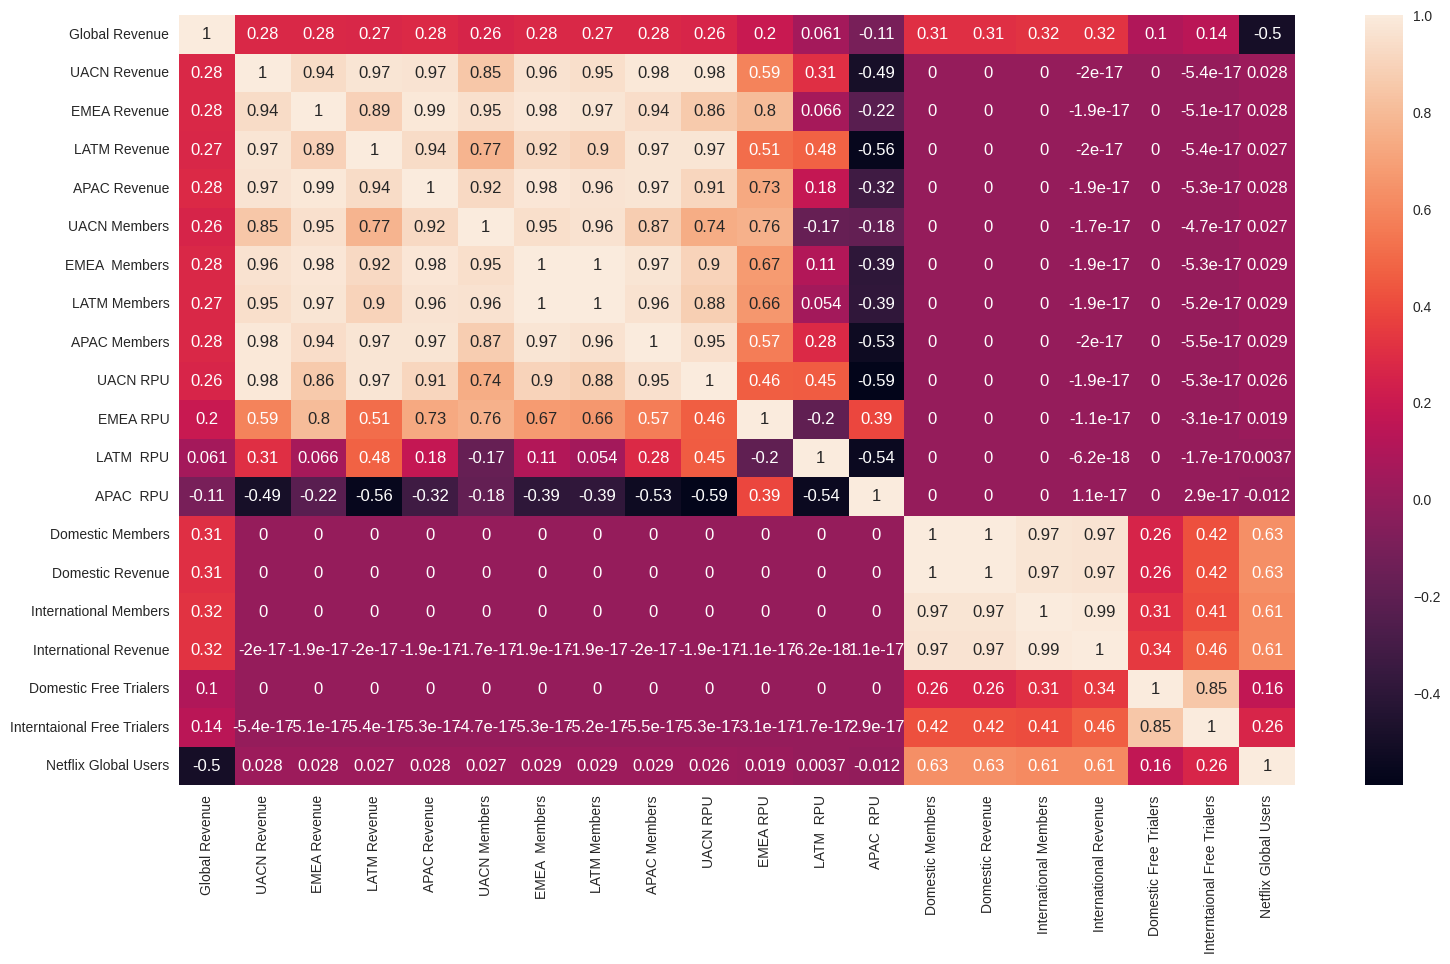

In [23]:
plt.figure(figsize=(18,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

# Exploratory Data Analysis

In [24]:
import warnings
warnings.filterwarnings("ignore")

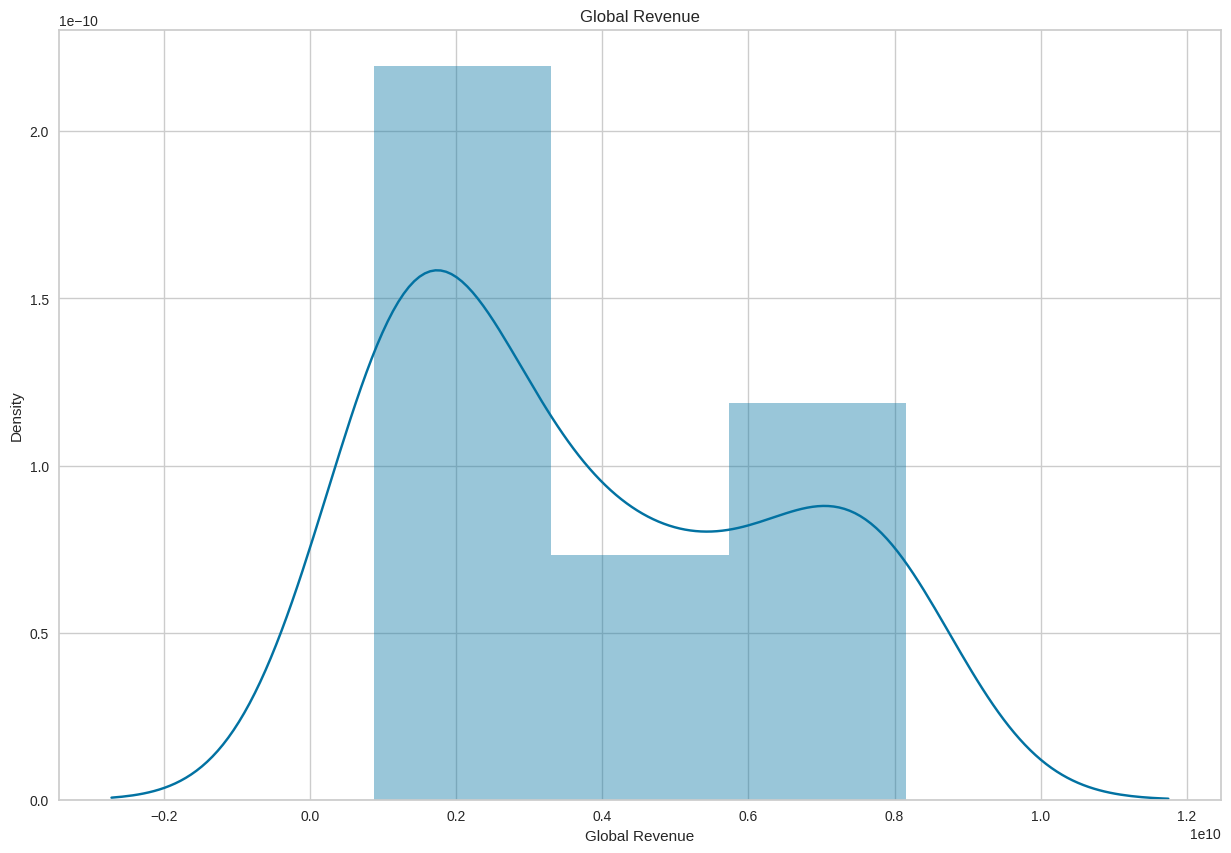

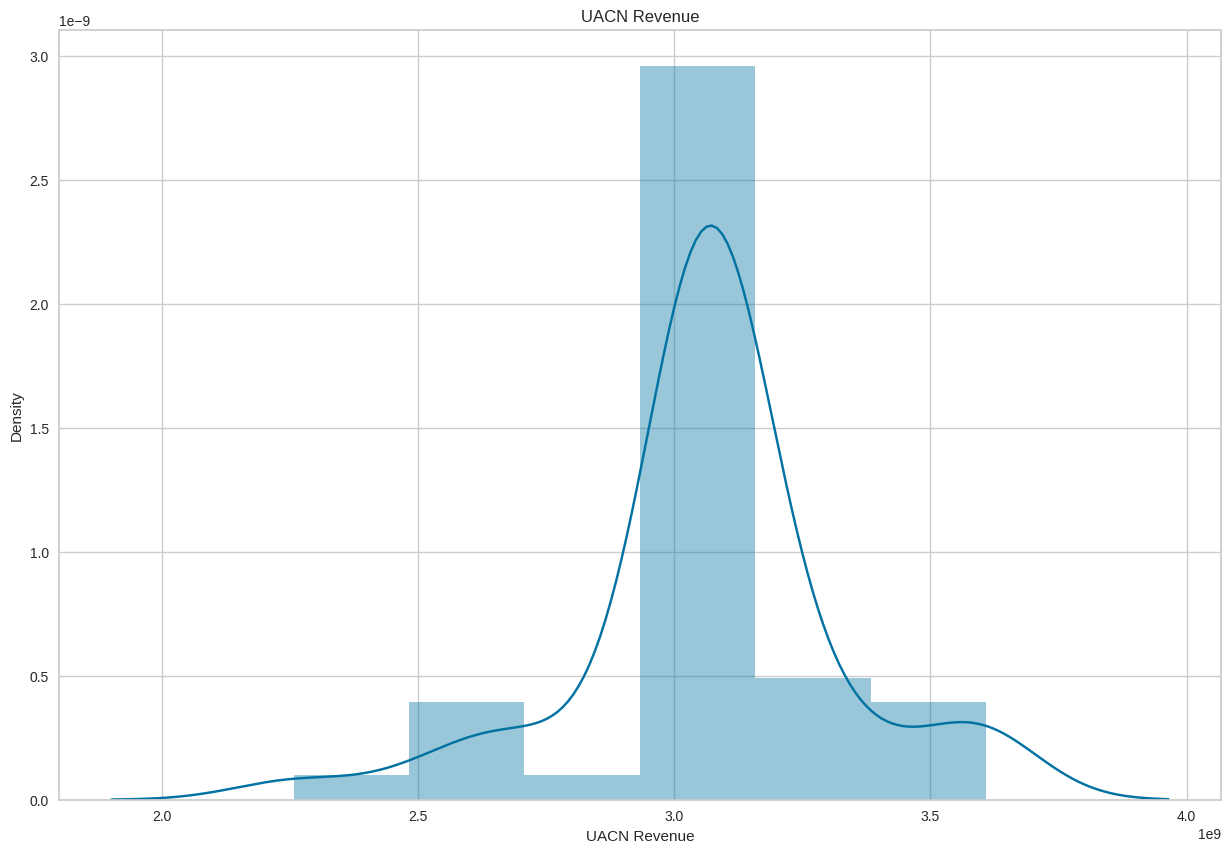

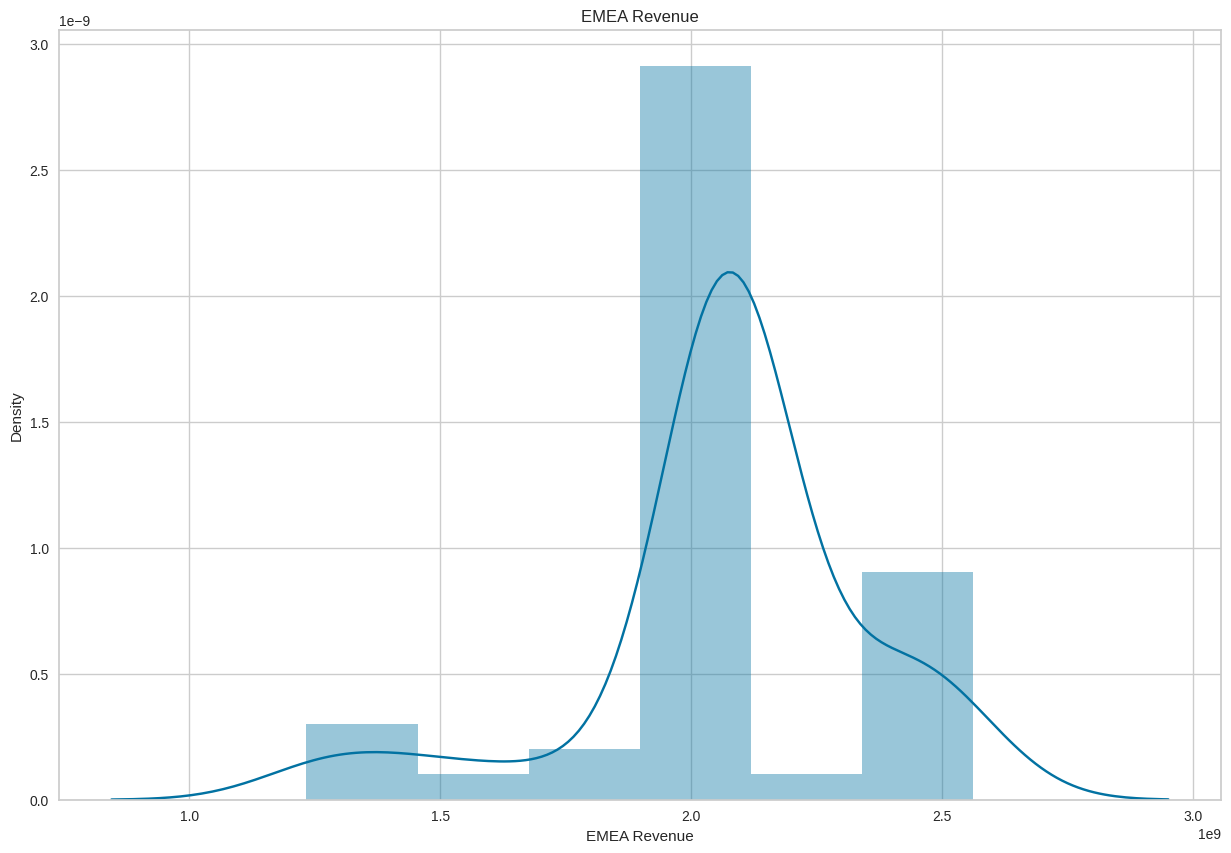

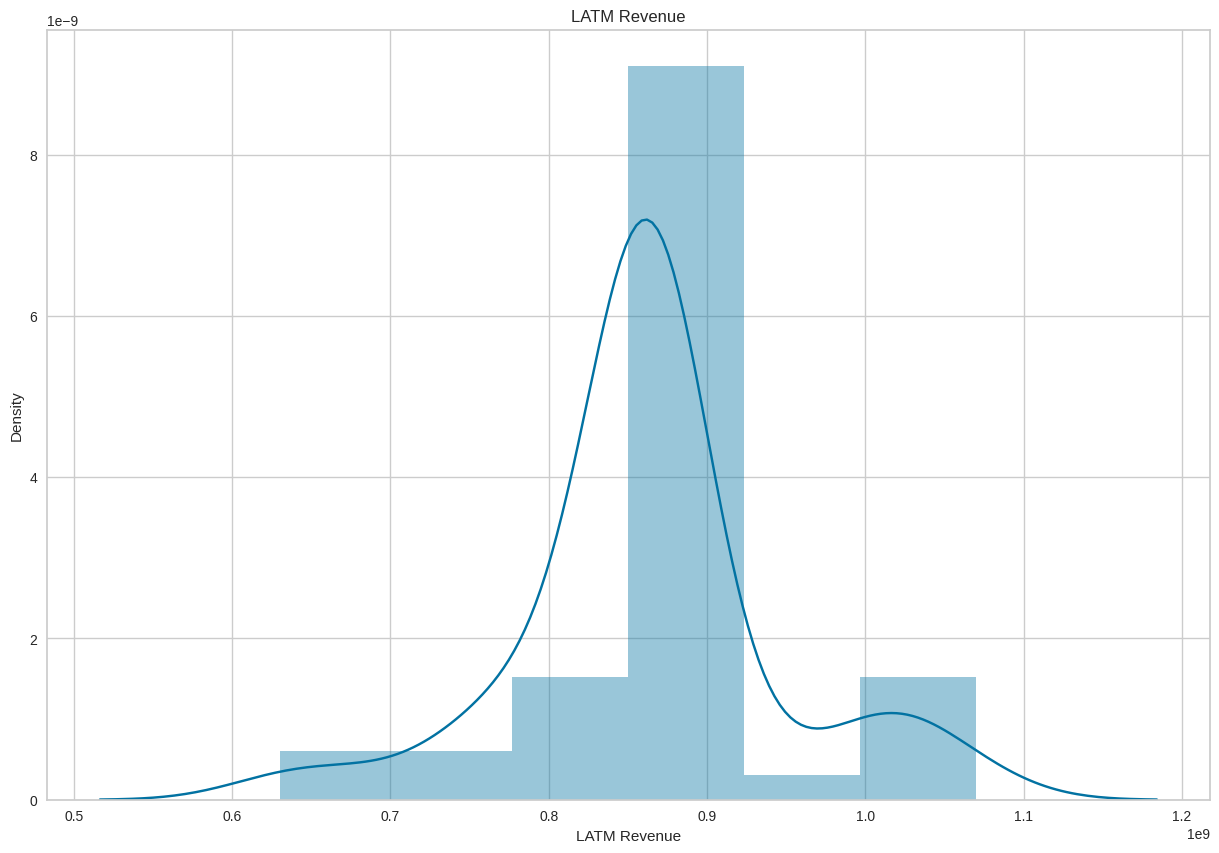

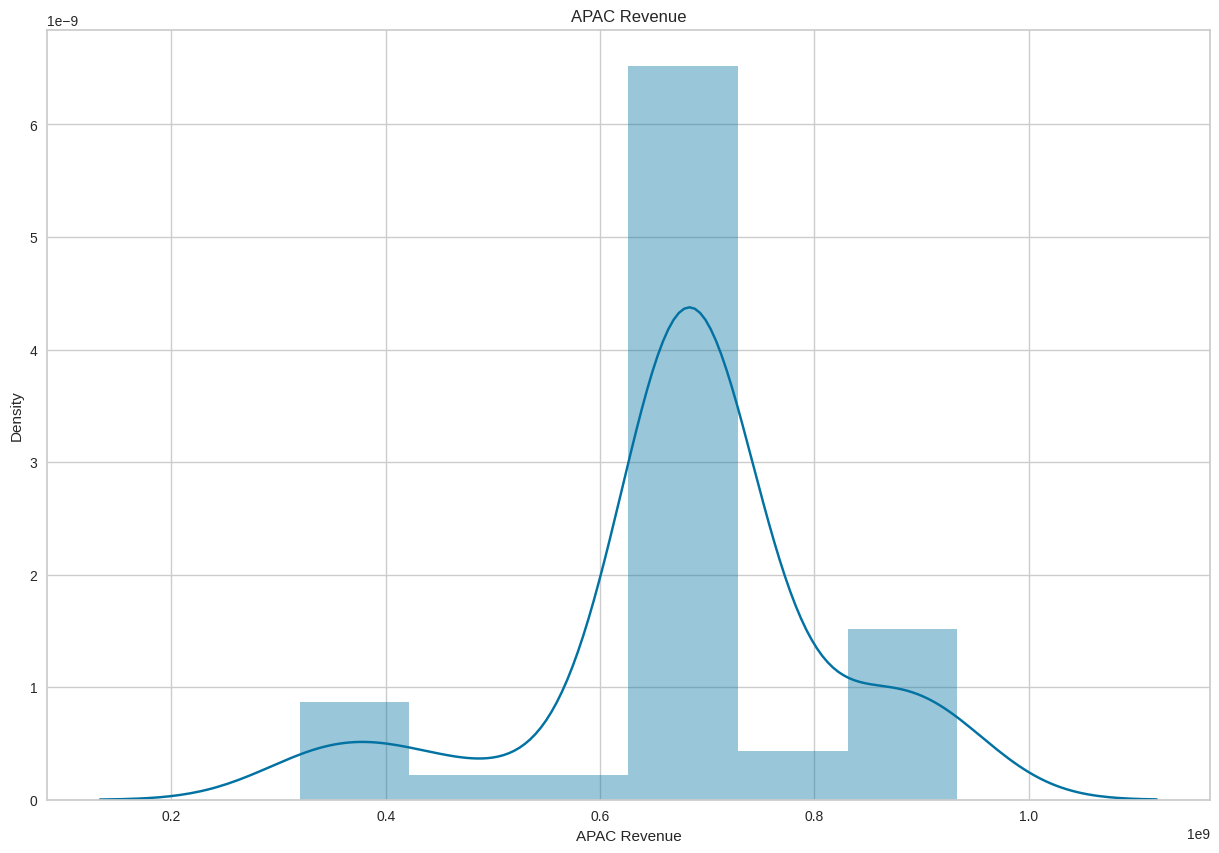

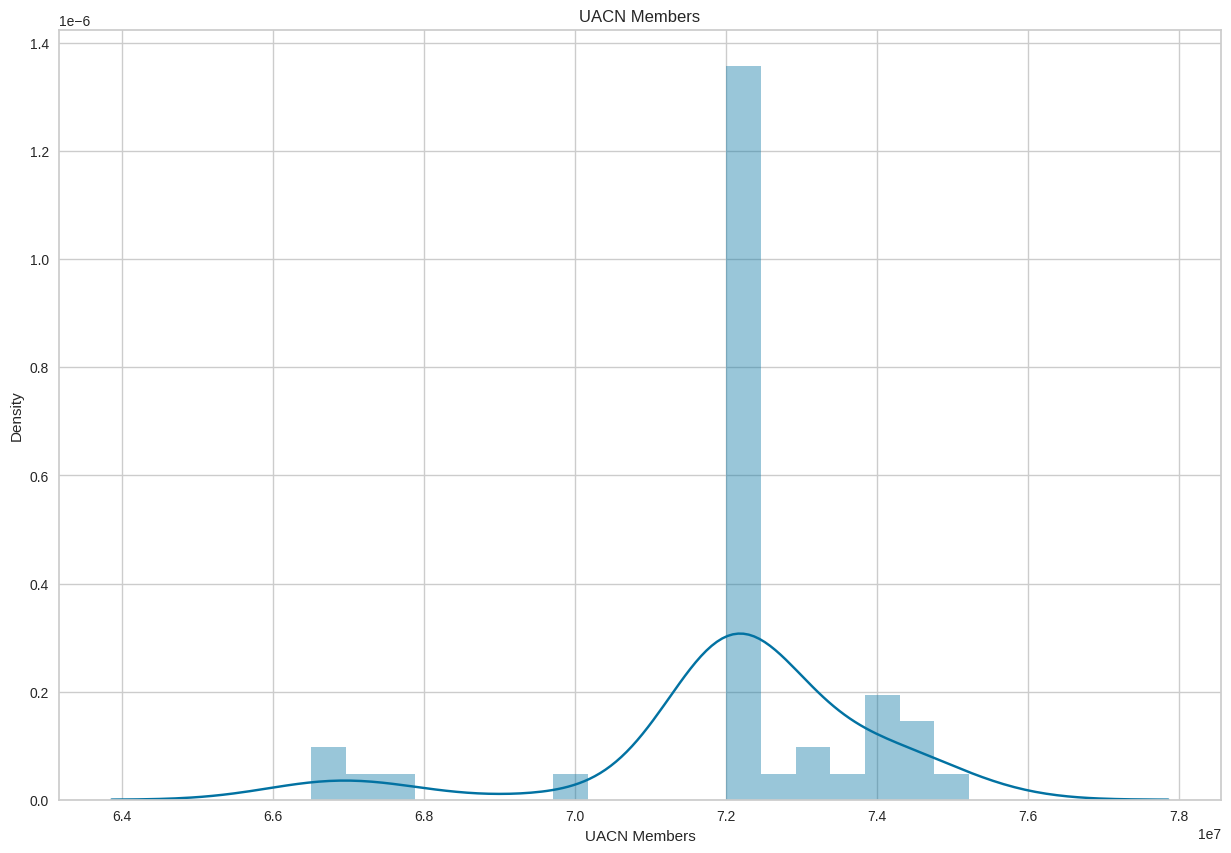

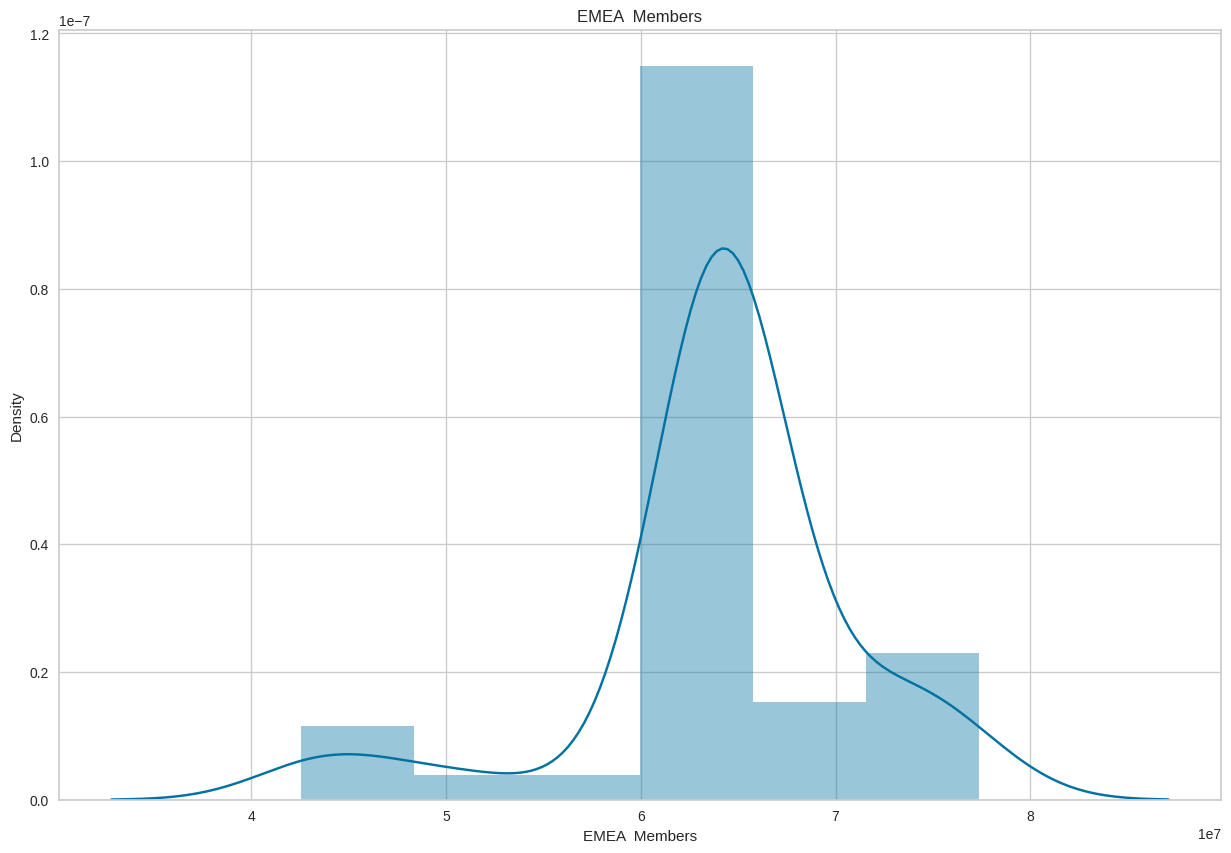

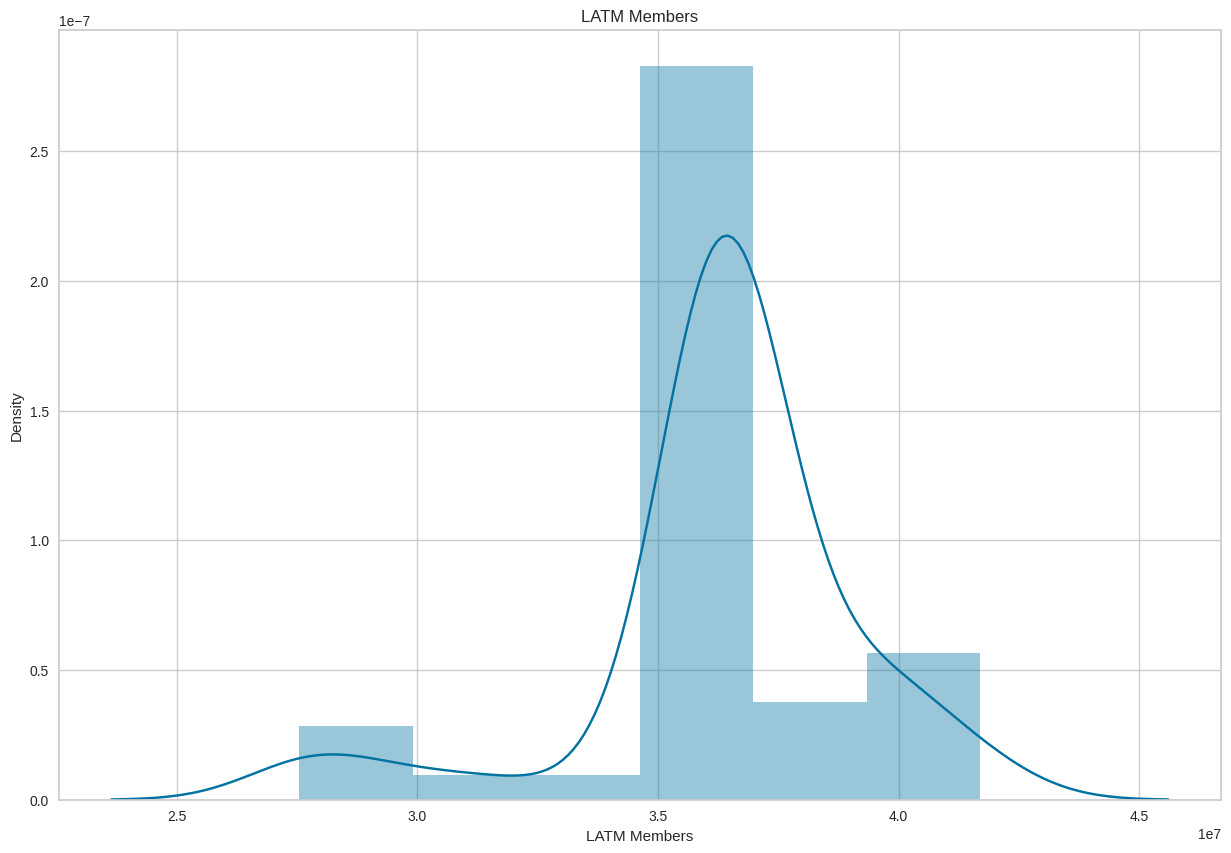

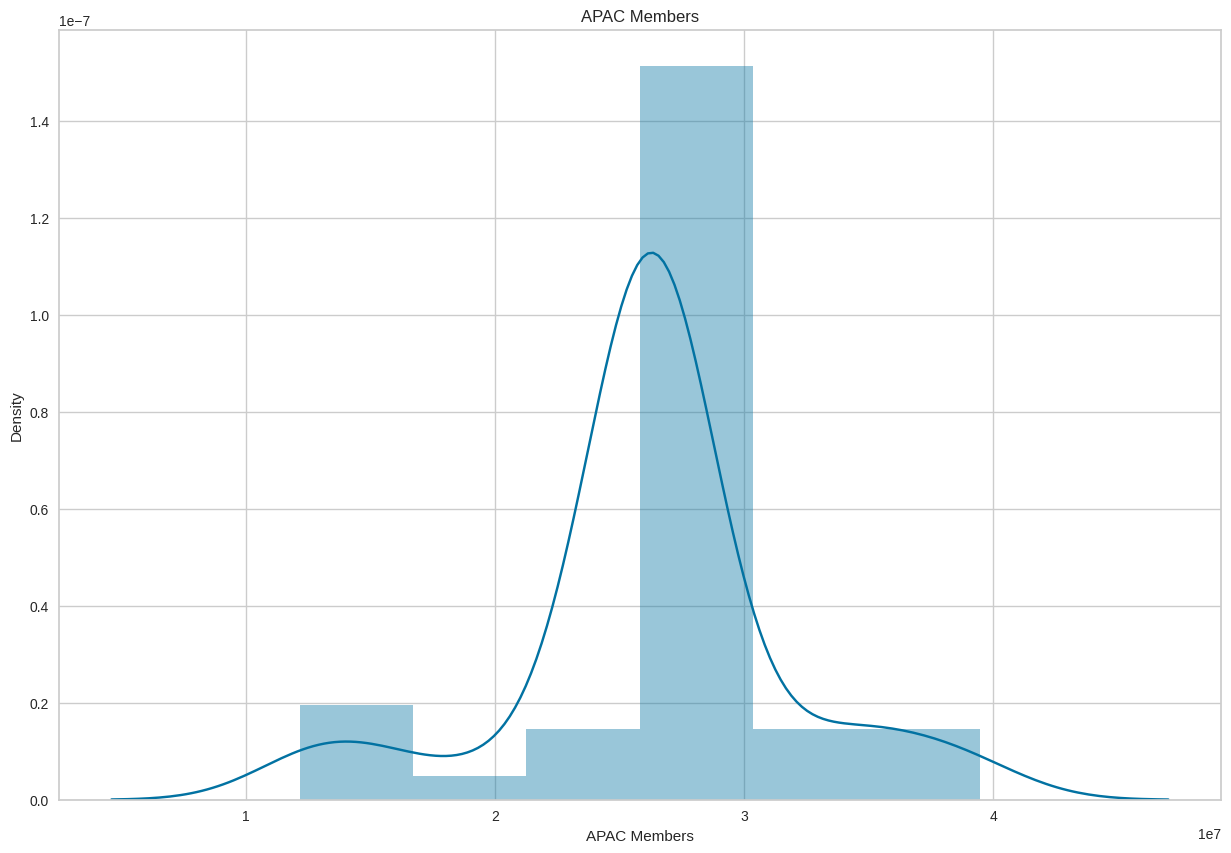

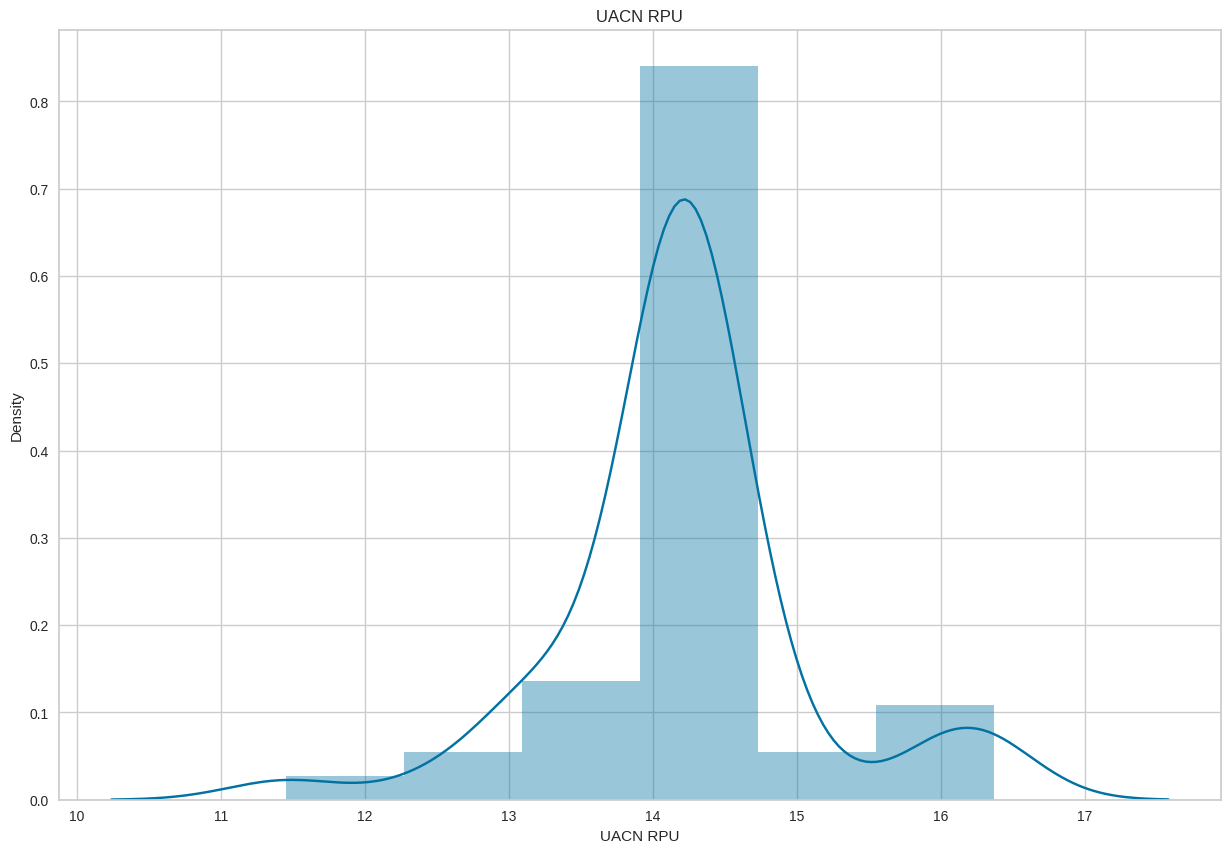

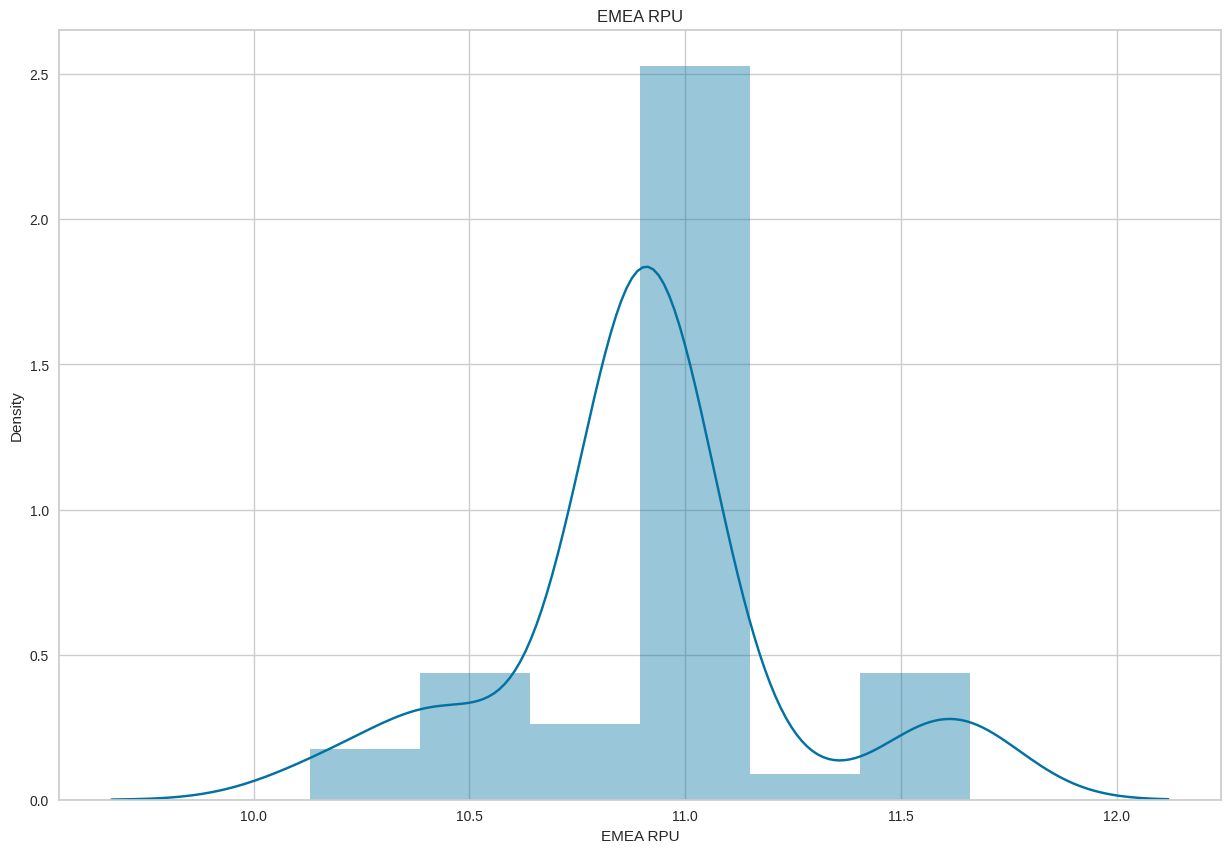

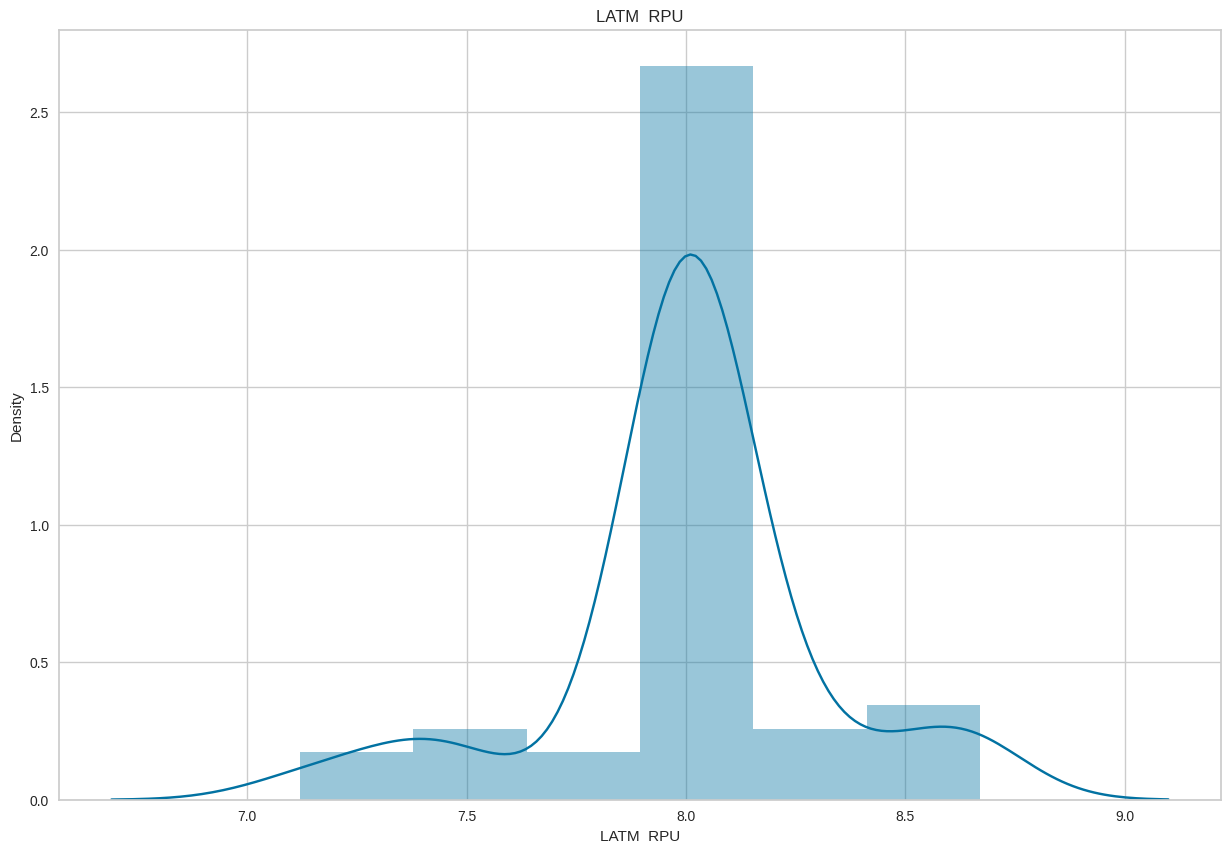

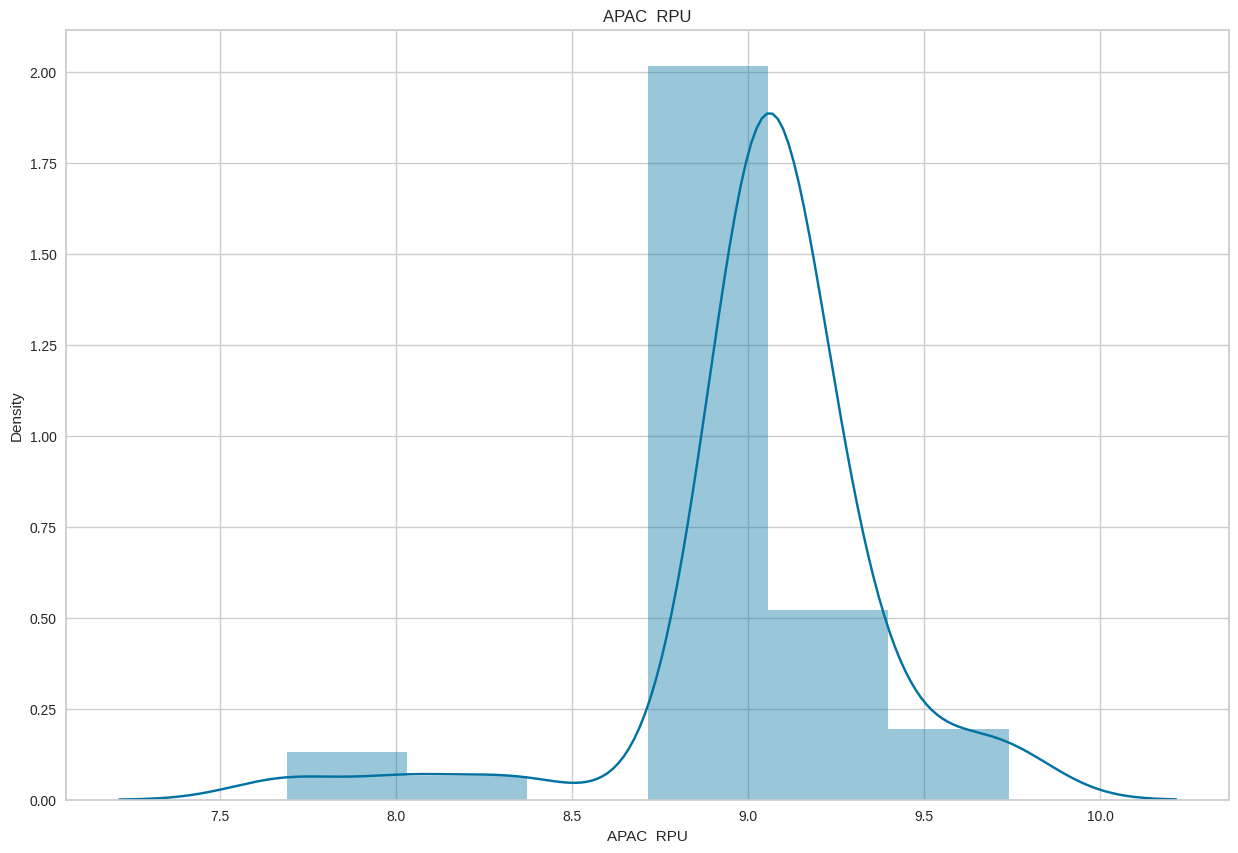

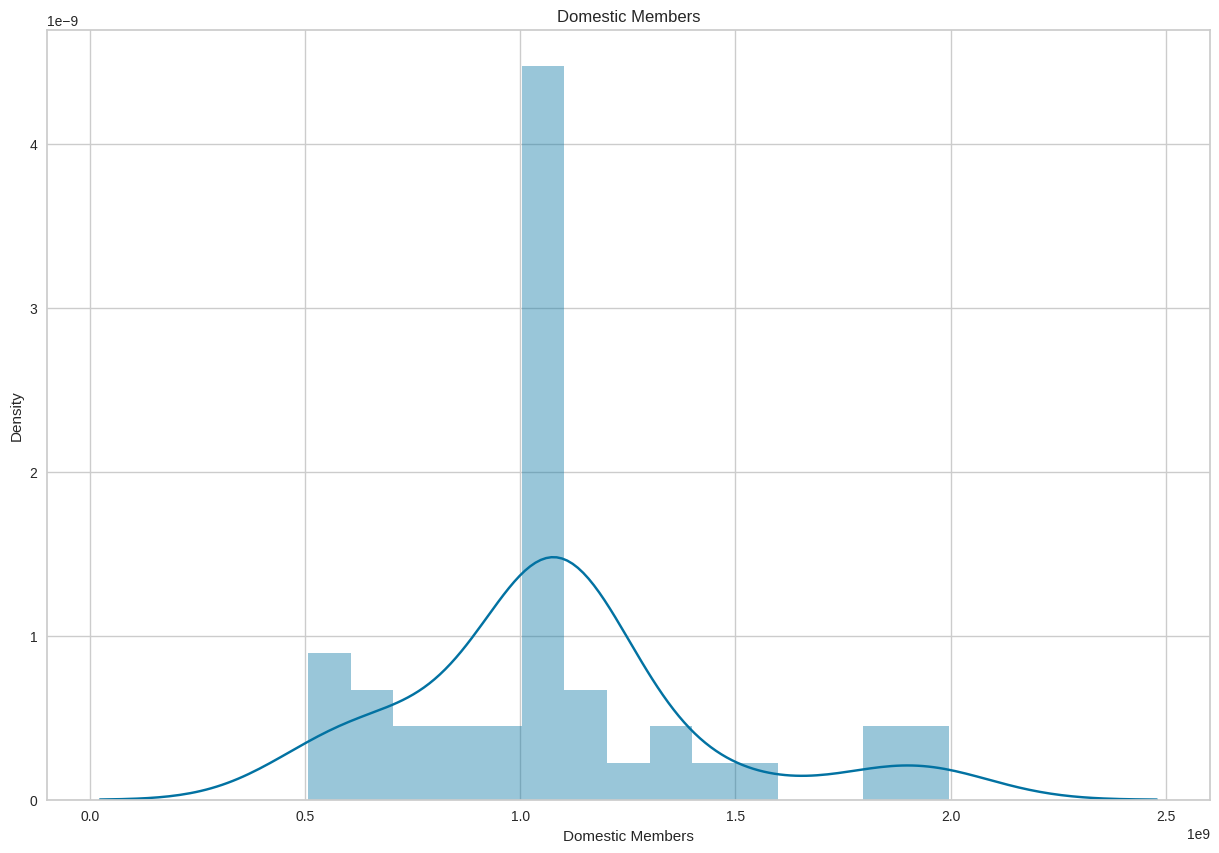

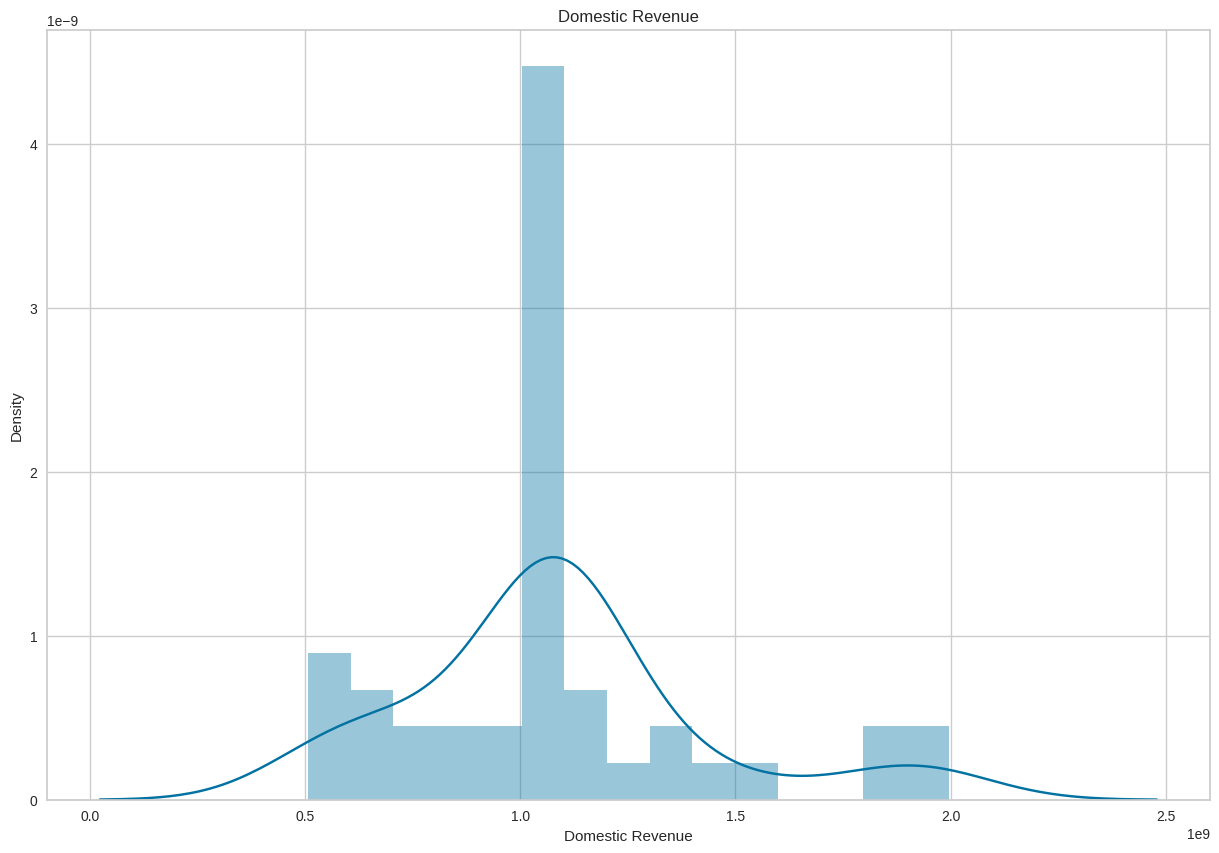

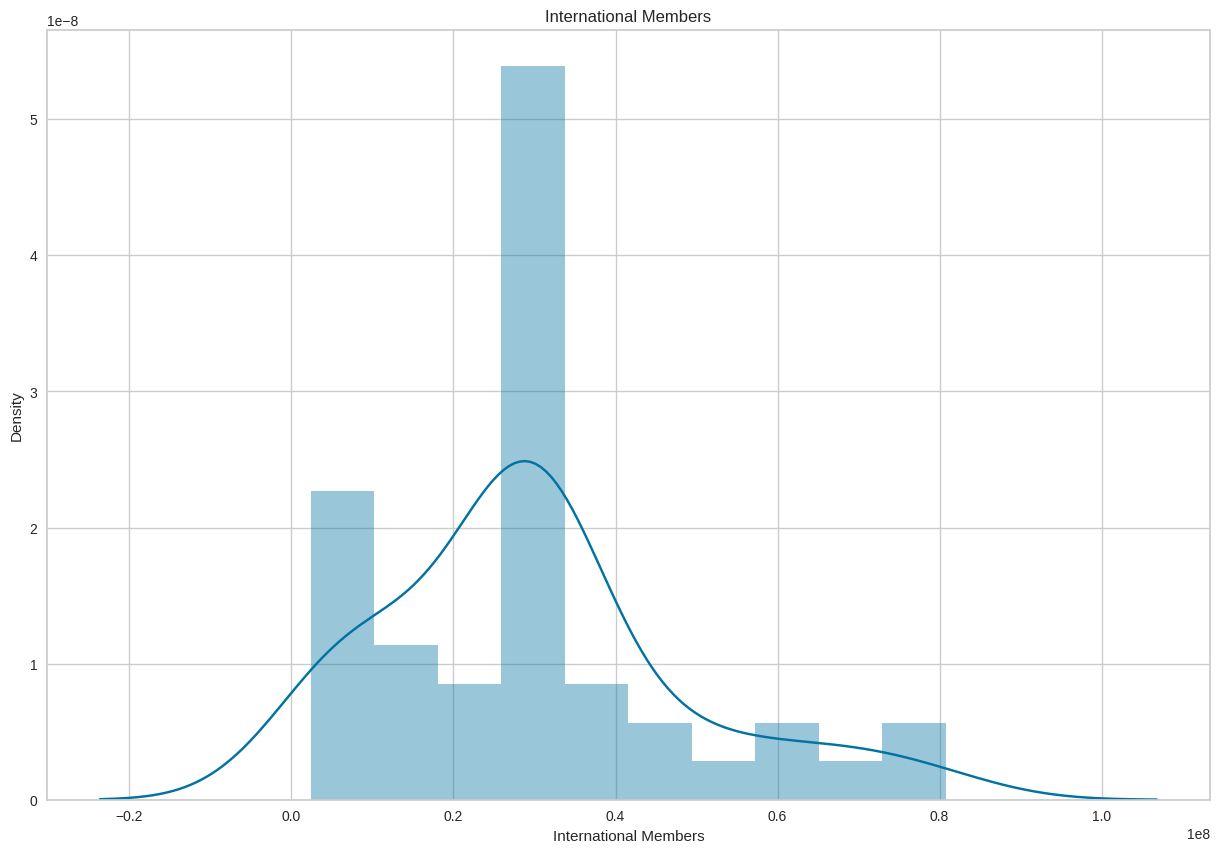

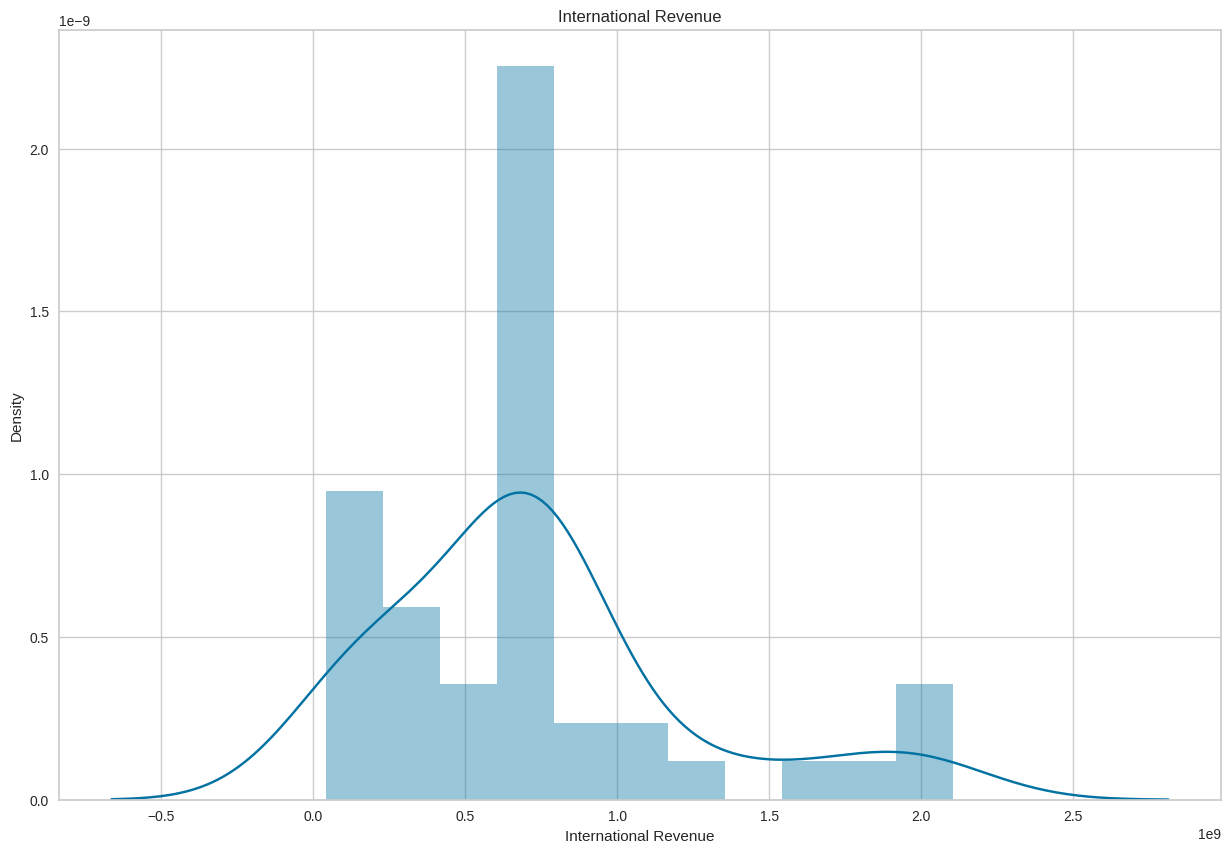

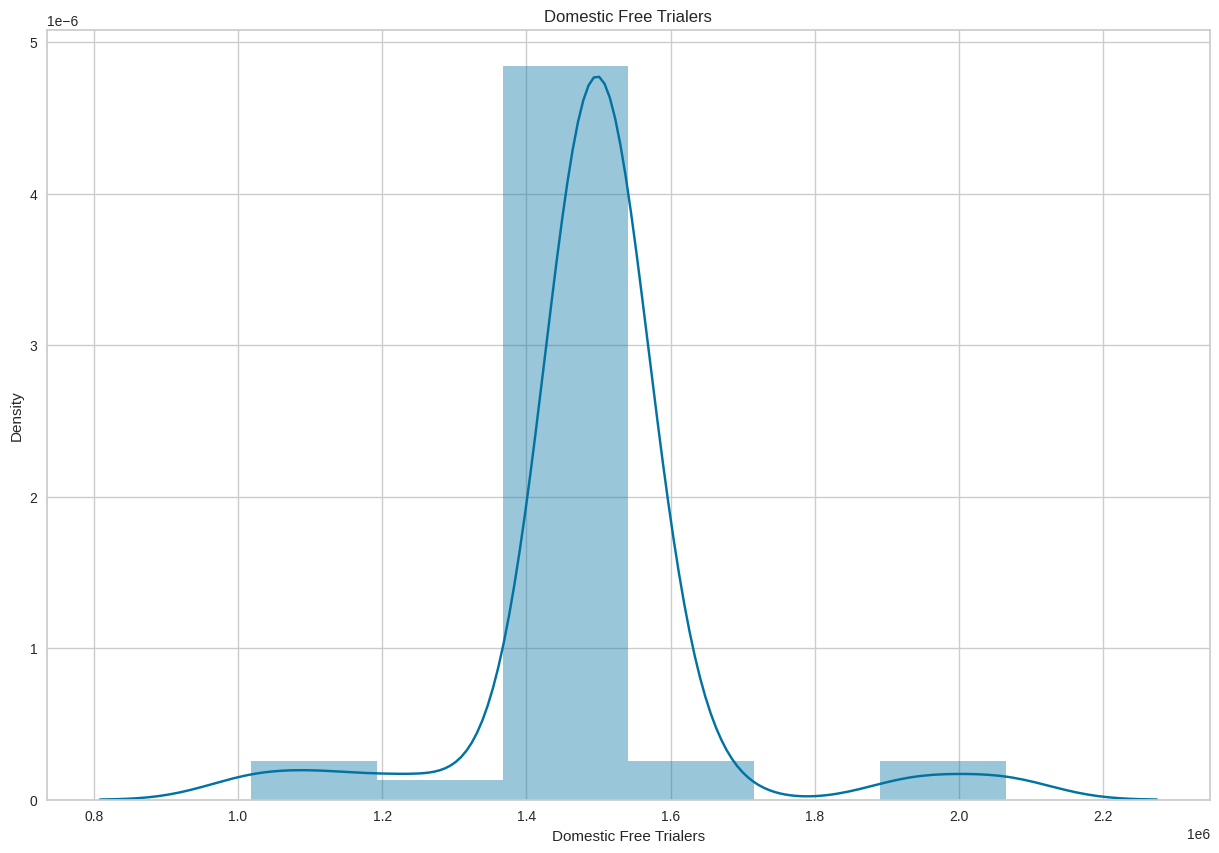

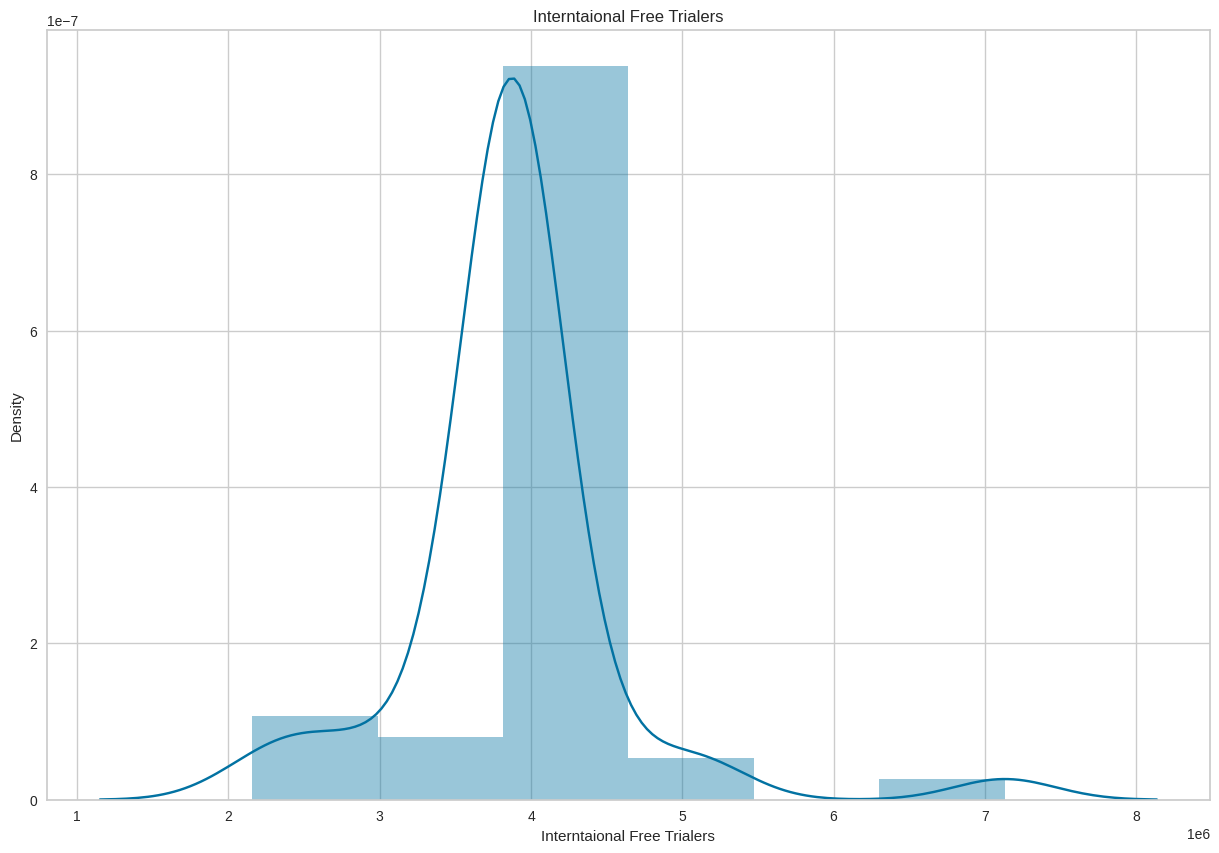

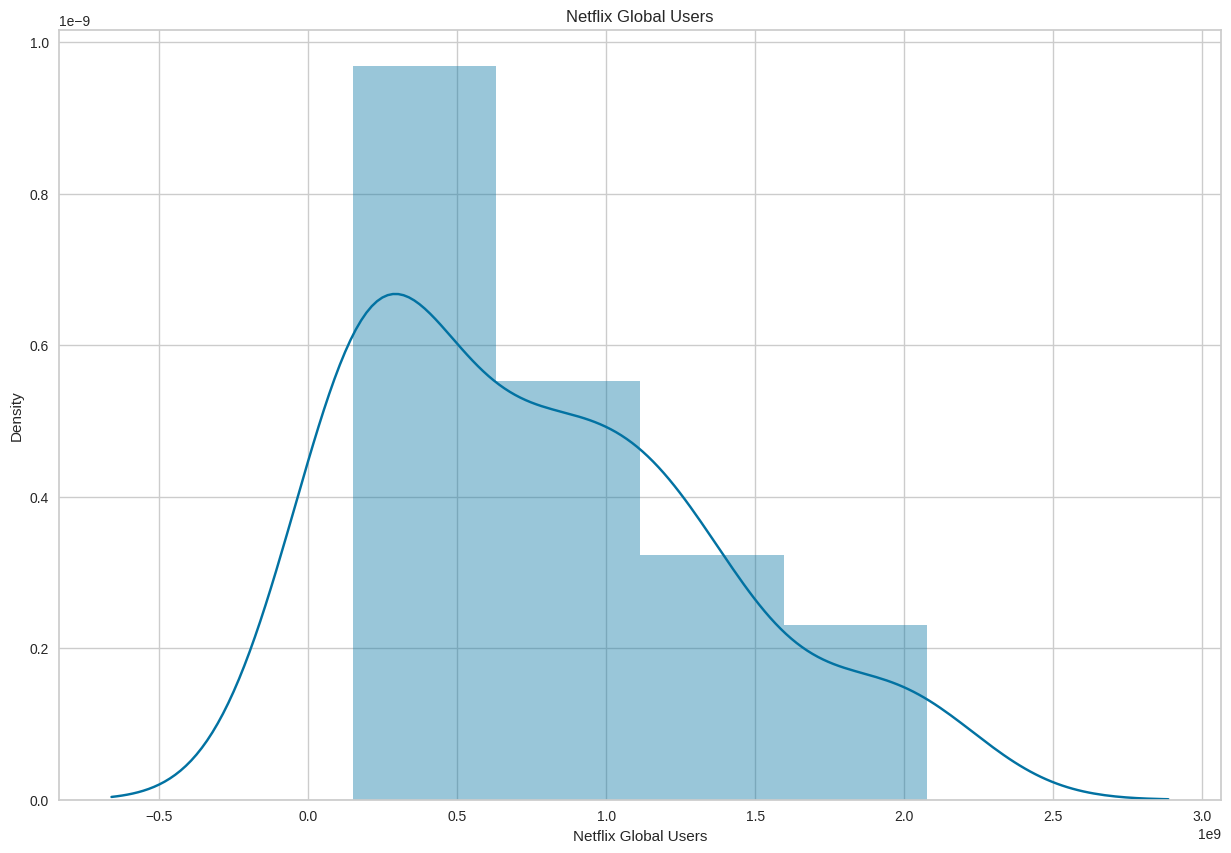

In [26]:
for i in data.drop(["Date"],axis=1).columns:
    plt.figure(figsize=(15,10))
    sns.distplot(data[i])
    plt.title(f"{i}")
    plt.show()

<Figure size 1500x1500 with 0 Axes>

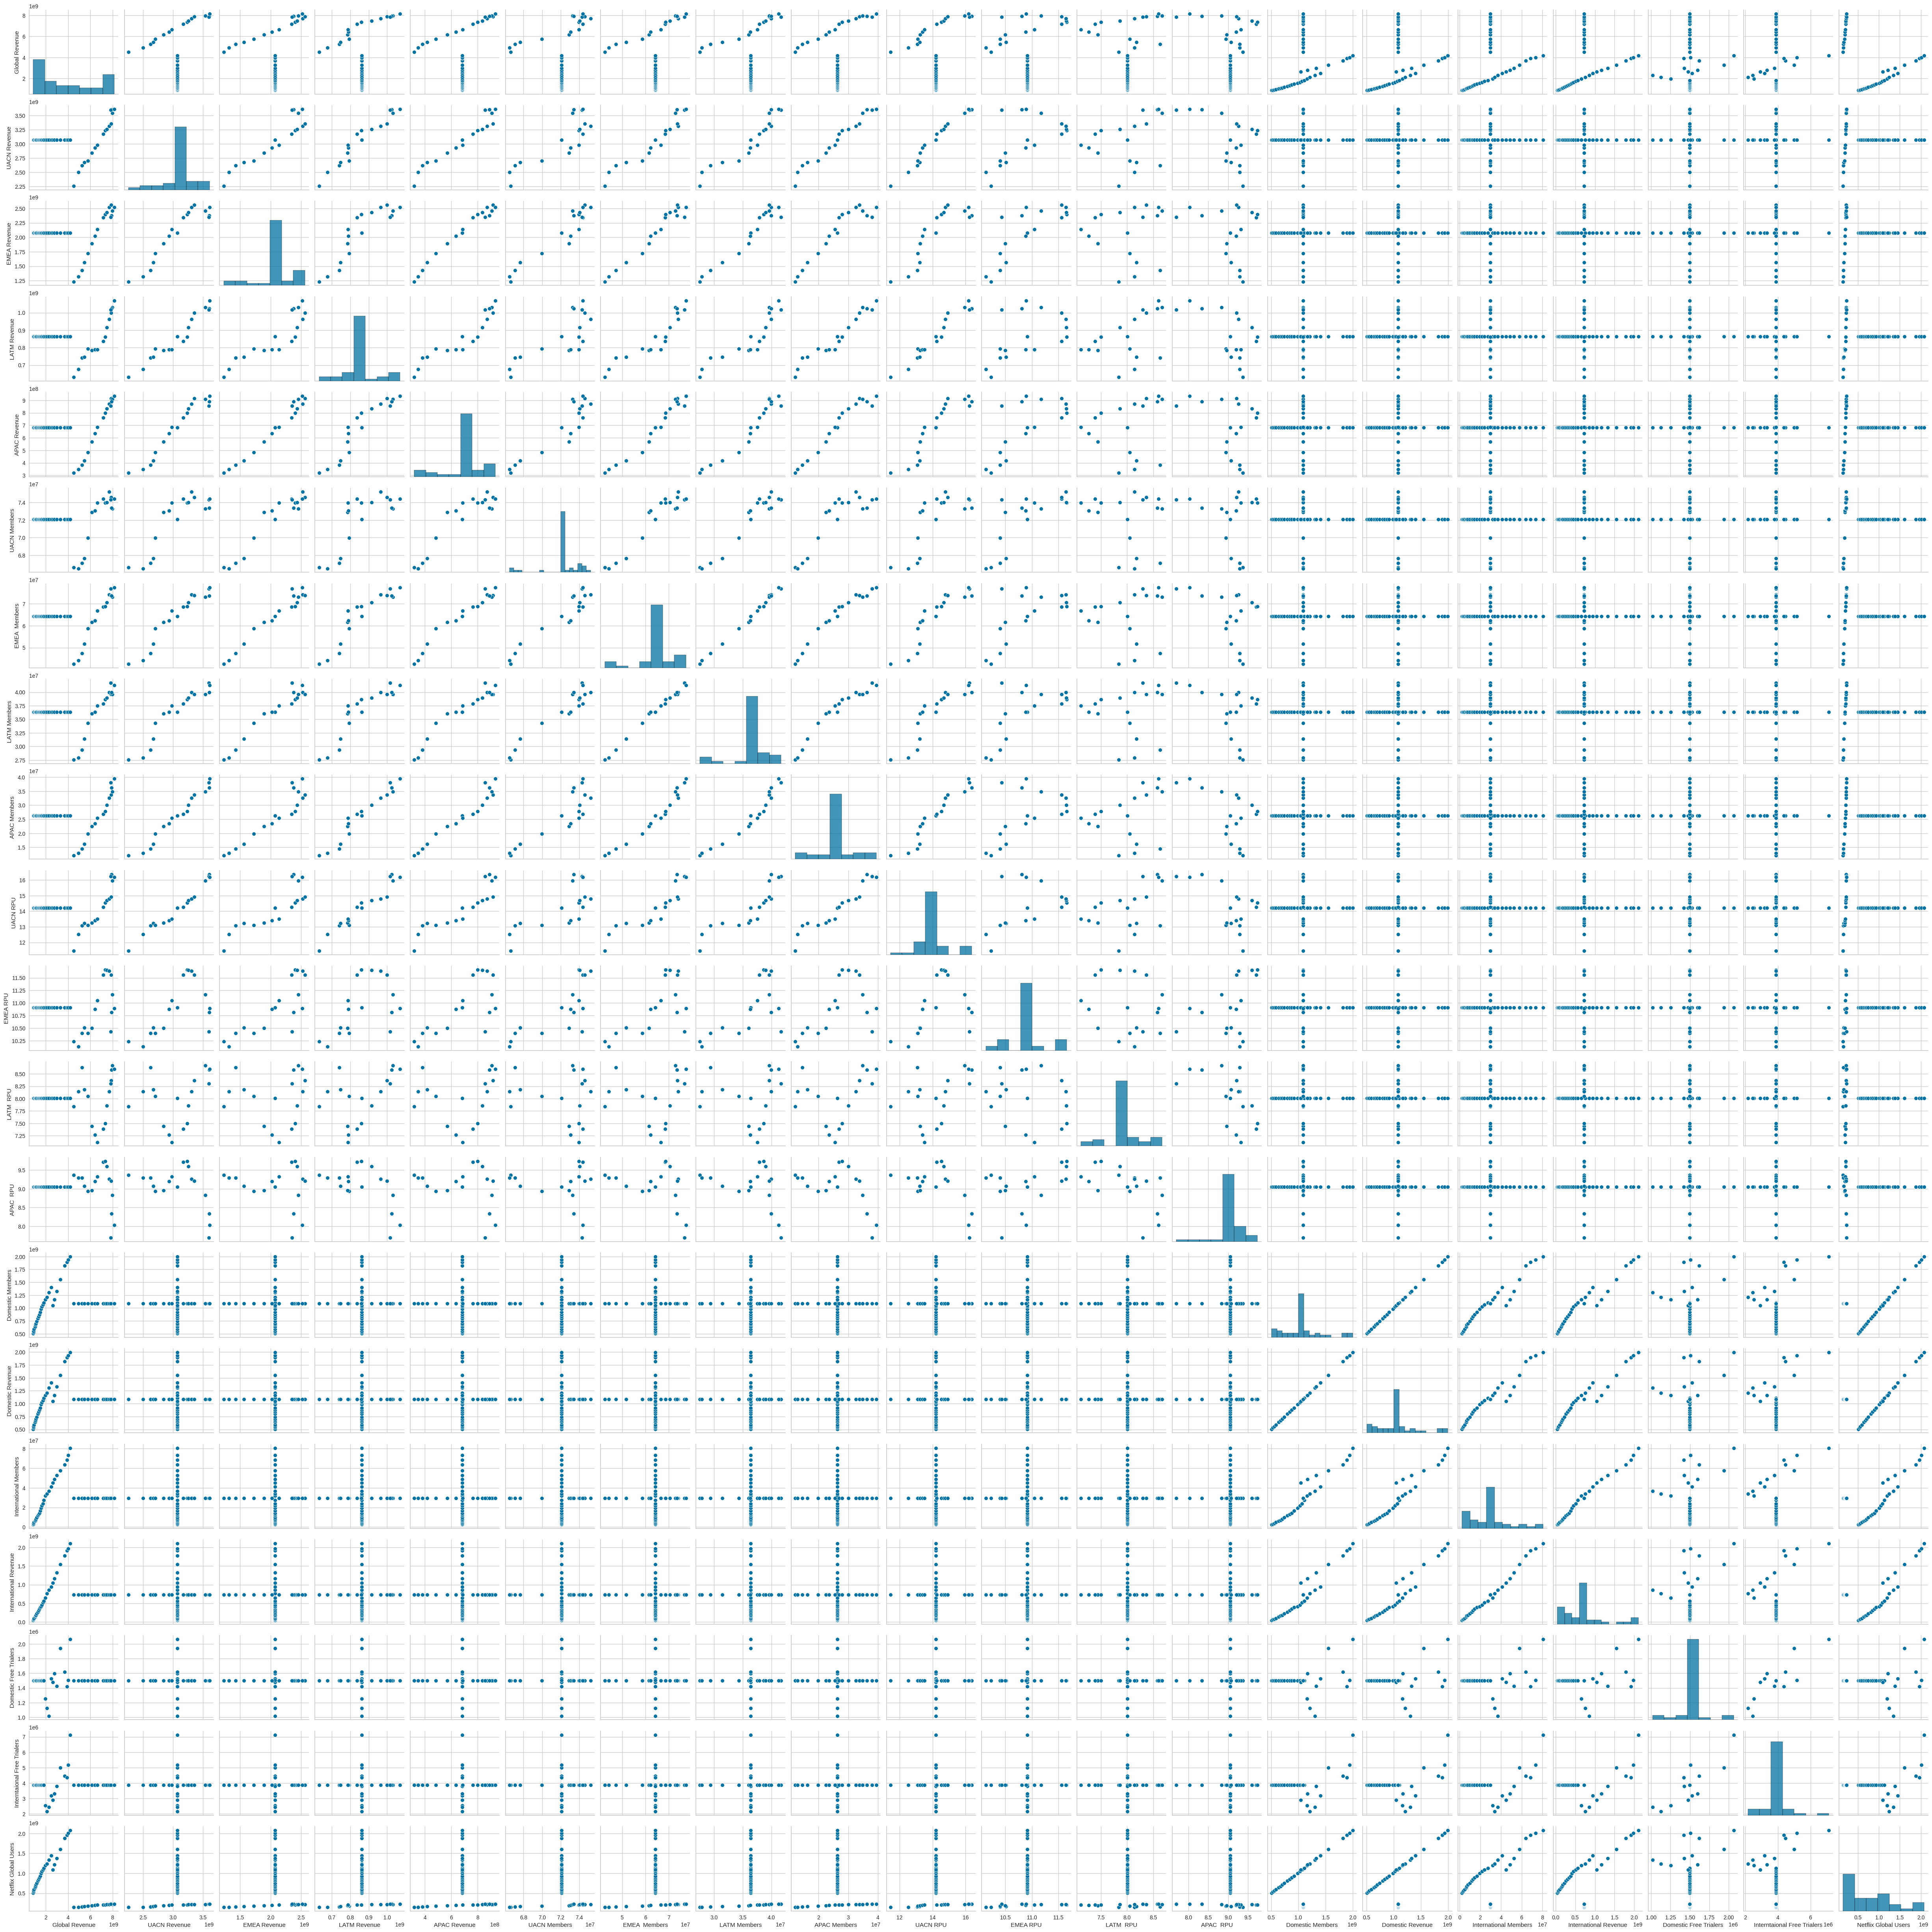

In [27]:
plt.figure(figsize=(15,15))
sns.pairplot(data)
plt.show()

In [28]:
c = []
b= []
for i in data.columns:
    new = data[i].max()
    c.append(new)
    b.append(i)
    
    

In [36]:
c

['31-12-2022',
 8161503000.0,
 3608645000.0,
 2561831000.0,
 1070192000.0,
 933523000.0,
 75215000.0,
 77373000.0,
 41699000.0,
 39478000.0,
 16.37,
 11.66,
 8.67,
 9.74,
 1996092000.0,
 1996092000.0,
 80773000.0,
 2105592000.0,
 2065000.0,
 7131000.0,
 2076865000.0]

In [37]:
b

['Date',
 'Global Revenue',
 'UACN Revenue',
 'EMEA Revenue',
 'LATM Revenue',
 'APAC Revenue',
 'UACN Members',
 'EMEA  Members',
 'LATM Members',
 'APAC Members',
 'UACN RPU',
 'EMEA RPU',
 'LATM  RPU',
 'APAC  RPU',
 'Domestic Members',
 'Domestic Revenue',
 'International Members',
 'International Revenue',
 'Domestic Free Trialers',
 'Interntaional Free Trialers',
 'Netflix Global Users']

In [38]:
len(b)

21

In [39]:
len(c)

21

# Train model & Evaluate

In [29]:
experiment = setup(data,target="Netflix Global Users")

,Description,Value
0,Session id,8682
1,Target,Netflix Global Users
2,Target type,Regression
3,Original data shape,"(45, 21)"
4,Transformed data shape,"(45, 21)"
5,Transformed train set shape,"(31, 21)"
6,Transformed test set shape,"(14, 21)"
7,Numeric features,19
8,Categorical features,1
9,Preprocess,True


In [30]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dt,Decision Tree Regressor,447573005.4667,588938410042233088.0000,606880191.8112,-1.0553,0.9705,0.3492,0.2110
knn,K Neighbors Regressor,117864592.7000,42669916088487120.0000,165497177.5000,-8.3924,0.2075,0.2345,0.2090
huber,Huber Regressor,62627890.2483,9467238474735860.0000,81041949.4144,-8.7190,0.5119,0.2667,0.2960
omp,Orthogonal Matching Pursuit,145926427.1269,33708988162618328.0000,161863062.8639,-35.3287,0.9396,0.5340,0.2040
rf,Random Forest Regressor,393389357.0653,297900672392658048.0000,458277266.5509,-145.9436,0.6708,0.7545,0.6360
llar,Lasso Least Angle Regression,478429555.3156,354057737963553472.0000,532703094.9434,-154.2602,0.8926,1.2905,0.2030
par,Passive Aggressive Regressor,175565131.8938,50486372203185200.0000,198691645.1531,-193.3577,0.6515,0.6730,0.2160
gbr,Gradient Boosting Regressor,453287903.1092,395160421785359232.0000,531458658.7387,-207.2840,0.8007,0.9128,0.4460
et,Extra Trees Regressor,304690846.6653,129524506232118576.0000,331909453.8318,-246.9956,0.6493,0.9231,0.6570
ada,AdaBoost Regressor,424042570.8059,275406914920053568.0000,469072316.5673,-588.4775,0.7477,1.1863,0.4270


In [31]:
predict_model(best_model,data)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,148103067.7333,160809143816901344.0000,401010154.2566,0.5065,0.6834,0.1187


,Date,Global Revenue,UACN Revenue,EMEA Revenue,LATM Revenue,APAC Revenue,UACN Members,EMEA Members,LATM Members,APAC Members,...,LATM RPU,APAC RPU,Domestic Members,Domestic Revenue,International Members,International Revenue,Domestic Free Trialers,Interntaional Free Trialers,Netflix Global Users,prediction_label
0,31-03-2012,8.697910e+08,3.068941e+09,2.075164e+09,8.629001e+08,683068608.0,72077472.0,64184472.0,36358824.0,26281294.0,...,8.004705,9.05,5.066650e+08,5.066650e+08,2409000.0,4.342500e+07,1498000.0,3873833.25,5.090740e+08,5.090740e+08
1,30-06-2012,8.891630e+08,3.068941e+09,2.075164e+09,8.629001e+08,683068608.0,72077472.0,64184472.0,36358824.0,26281294.0,...,8.004705,9.05,5.327050e+08,5.327050e+08,3024000.0,6.497300e+07,1498000.0,3873833.25,5.357290e+08,5.090740e+08
2,30-09-2012,9.050890e+08,3.068941e+09,2.075164e+09,8.629001e+08,683068608.0,72077472.0,64184472.0,36358824.0,26281294.0,...,8.004705,9.05,5.560270e+08,5.560270e+08,3689000.0,7.774400e+07,1498000.0,3873833.25,5.597160e+08,5.597160e+08
3,31-12-2012,9.452390e+08,3.068941e+09,2.075164e+09,8.629001e+08,683068608.0,72077472.0,64184472.0,36358824.0,26281294.0,...,8.004705,9.05,5.894710e+08,5.894710e+08,4892000.0,1.014000e+08,1498000.0,3873833.25,5.943630e+08,5.597160e+08
4,31-03-2013,1.023961e+09,3.068941e+09,2.075164e+09,8.629001e+08,683068608.0,72077472.0,64184472.0,36358824.0,26281294.0,...,8.004705,9.05,6.386490e+08,6.386490e+08,6331000.0,1.420190e+08,1498000.0,3873833.25,6.449800e+08,6.449800e+08
5,30-06-2013,1.069372e+09,3.068941e+09,2.075164e+09,8.629001e+08,683068608.0,72077472.0,64184472.0,36358824.0,26281294.0,...,8.004705,9.05,6.710890e+08,6.710890e+08,7014000.0,1.659020e+08,1498000.0,3873833.25,6.781030e+08,6.781030e+08
6,30-09-2013,1.105999e+09,3.068941e+09,2.075164e+09,8.629001e+08,683068608.0,72077472.0,64184472.0,36358824.0,26281294.0,...,8.004705,9.05,7.010830e+08,7.010830e+08,8084000.0,1.830510e+08,1498000.0,3873833.25,7.091670e+08,7.091670e+08
7,31-12-2013,1.175230e+09,3.068941e+09,2.075164e+09,8.629001e+08,683068608.0,72077472.0,64184472.0,36358824.0,26281294.0,...,8.004705,9.05,7.405540e+08,7.405540e+08,9722000.0,2.214180e+08,1498000.0,3873833.25,7.502760e+08,7.502760e+08
8,31-03-2014,1.270089e+09,3.068941e+09,2.075164e+09,8.629001e+08,683068608.0,72077472.0,64184472.0,36358824.0,26281294.0,...,8.004705,9.05,7.986170e+08,7.986170e+08,11755000.0,2.671180e+08,1498000.0,3873833.25,8.103720e+08,8.103720e+08
9,30-06-2014,1.340407e+09,3.068941e+09,2.075164e+09,8.629001e+08,683068608.0,72077472.0,64184472.0,36358824.0,26281294.0,...,8.004705,9.05,8.382250e+08,8.382250e+08,12907000.0,3.074610e+08,1498000.0,3873833.25,8.511320e+08,8.103720e+08


In [32]:
save_model(best_model,"regression")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Global Revenue', 'UACN Revenue',
                                              'EMEA Revenue', 'LATM Revenue',
                                              'APAC Revenue', 'UACN Members',
                                              'EMEA  Members', 'LATM Members',
                                              'APAC Members', 'UACN RPU',
                                              'EMEA RPU', 'LATM  RPU',
                                              'APAC  RPU', 'Domestic Members',
                                              'Domestic Revenue',
                                              'International Members',
                                              'International Reve...
                 ('categorical_imputer',
                  TransformerWrapper(include=['Date'],
                                     transformer=SimpleImputer(strate

In [33]:
model = load_model("regression")

Transformation Pipeline and Model Successfully Loaded


In [34]:
model.predict(data.drop(["Netflix Global Users"],axis=1).head())

array([5.09073984e+08, 5.09073984e+08, 5.59715968e+08, 5.59715968e+08,
       6.44979968e+08])

In [35]:
model.predict(data.drop(["Netflix Global Users"],axis=1).tail())

array([2.21640992e+08, 2.20672000e+08, 2.23084992e+08, 2.32498000e+08,
       2.32498000e+08])

In [40]:
first = data.head()
first["predicted"]=model.predict(data.drop(["Netflix Global Users"],axis=1).head())
first

,Date,Global Revenue,UACN Revenue,EMEA Revenue,LATM Revenue,APAC Revenue,UACN Members,EMEA Members,LATM Members,APAC Members,...,LATM RPU,APAC RPU,Domestic Members,Domestic Revenue,International Members,International Revenue,Domestic Free Trialers,Interntaional Free Trialers,Netflix Global Users,predicted
0,31-03-2012,8.697910e+08,3.068941e+09,2.075164e+09,8.629001e+08,6.830686e+08,7.207747e+07,6.418447e+07,3.635882e+07,2.628129e+07,...,8.004706,9.05,506665000.0,506665000.0,2409000.0,43425000.0,1498000.0,3.873833e+06,509074000.0,509073984.0
1,30-06-2012,8.891630e+08,3.068941e+09,2.075164e+09,8.629001e+08,6.830686e+08,7.207747e+07,6.418447e+07,3.635882e+07,2.628129e+07,...,8.004706,9.05,532705000.0,532705000.0,3024000.0,64973000.0,1498000.0,3.873833e+06,535729000.0,509073984.0
2,30-09-2012,9.050890e+08,3.068941e+09,2.075164e+09,8.629001e+08,6.830686e+08,7.207747e+07,6.418447e+07,3.635882e+07,2.628129e+07,...,8.004706,9.05,556027000.0,556027000.0,3689000.0,77744000.0,1498000.0,3.873833e+06,559716000.0,559715968.0
3,31-12-2012,9.452390e+08,3.068941e+09,2.075164e+09,8.629001e+08,6.830686e+08,7.207747e+07,6.418447e+07,3.635882e+07,2.628129e+07,...,8.004706,9.05,589471000.0,589471000.0,4892000.0,101400000.0,1498000.0,3.873833e+06,594363000.0,559715968.0
4,31-03-2013,1.023961e+09,3.068941e+09,2.075164e+09,8.629001e+08,6.830686e+08,7.207747e+07,6.418447e+07,3.635882e+07,2.628129e+07,...,8.004706,9.05,638649000.0,638649000.0,6331000.0,142019000.0,1498000.0,3.873833e+06,644980000.0,644979968.0


In [42]:
last = data.tail()
last["predicted"]=model.predict(data.drop(["Netflix Global Users"],axis=1).tail())
last

,Date,Global Revenue,UACN Revenue,EMEA Revenue,LATM Revenue,APAC Revenue,UACN Members,EMEA Members,LATM Members,APAC Members,...,LATM RPU,APAC RPU,Domestic Members,Domestic Revenue,International Members,International Revenue,Domestic Free Trialers,Interntaional Free Trialers,Netflix Global Users,predicted
40,31-03-2022,7.867767e+09,3.350424e+09,2.561831e+09,9.989480e+08,916754000.0,74579000.0,73733000.0,39610000.0,33719000.0,...,8.37,9.21,1.084327e+09,1.084327e+09,2.956664e+07,7.265650e+08,1498000.0,3.873833e+06,221641000.0,221640992.0
41,30-06-2022,7.970141e+09,3.537863e+09,2.457235e+09,1.030234e+09,907719000.0,73283000.0,72966000.0,39624000.0,34799000.0,...,8.67,8.83,1.084327e+09,1.084327e+09,2.956664e+07,7.265650e+08,1498000.0,3.873833e+06,220672000.0,220672000.0
42,30-09-2022,7.925589e+09,3.601565e+09,2.375814e+09,1.023945e+09,889037000.0,73387000.0,73534000.0,39936000.0,36228000.0,...,8.58,8.34,1.084327e+09,1.084327e+09,2.956664e+07,7.265650e+08,1498000.0,3.873833e+06,223085000.0,223084992.0
43,31-12-2022,7.852053e+09,3.594791e+09,2.350135e+09,1.016846e+09,856711000.0,74296000.0,76729000.0,41699000.0,38023000.0,...,8.30,7.69,1.084327e+09,1.084327e+09,2.956664e+07,7.265650e+08,1498000.0,3.873833e+06,230747000.0,232498000.0
44,31-03-2023,8.161503e+09,3.608645e+09,2.517641e+09,1.070192e+09,933523000.0,74398000.0,77373000.0,41249000.0,39478000.0,...,8.60,8.03,1.084327e+09,1.084327e+09,2.956664e+07,7.265650e+08,1498000.0,3.873833e+06,232498000.0,232498000.0


In [48]:
predict_model(model,data.drop(["Netflix Global Users"],axis=1).tail())

,Date,Global Revenue,UACN Revenue,EMEA Revenue,LATM Revenue,APAC Revenue,UACN Members,EMEA Members,LATM Members,APAC Members,...,EMEA RPU,LATM RPU,APAC RPU,Domestic Members,Domestic Revenue,International Members,International Revenue,Domestic Free Trialers,Interntaional Free Trialers,prediction_label
40,31-03-2022,7.867767e+09,3.350424e+09,2.561831e+09,9.989480e+08,916753984.0,74579000.0,73733000.0,39610000.0,33719000.0,...,11.56,8.37,9.21,1.084327e+09,1.084327e+09,29566642.0,726564992.0,1498000.0,3873833.25,221640992.0
41,30-06-2022,7.970141e+09,3.537863e+09,2.457235e+09,1.030234e+09,907718976.0,73283000.0,72966000.0,39624000.0,34799000.0,...,11.17,8.67,8.83,1.084327e+09,1.084327e+09,29566642.0,726564992.0,1498000.0,3873833.25,220672000.0
42,30-09-2022,7.925589e+09,3.601565e+09,2.375814e+09,1.023945e+09,889036992.0,73387000.0,73534000.0,39936000.0,36228000.0,...,10.81,8.58,8.34,1.084327e+09,1.084327e+09,29566642.0,726564992.0,1498000.0,3873833.25,223084992.0
43,31-12-2022,7.852053e+09,3.594791e+09,2.350135e+09,1.016846e+09,856710976.0,74296000.0,76729000.0,41699000.0,38023000.0,...,10.43,8.30,7.69,1.084327e+09,1.084327e+09,29566642.0,726564992.0,1498000.0,3873833.25,232498000.0
44,31-03-2023,8.161503e+09,3.608645e+09,2.517641e+09,1.070192e+09,933523008.0,74398000.0,77373000.0,41249000.0,39478000.0,...,10.89,8.60,8.03,1.084327e+09,1.084327e+09,29566642.0,726564992.0,1498000.0,3873833.25,232498000.0


In [55]:
data.shape

(45, 21)

In [60]:
model.predict(data.drop(["Netflix Global Users"],axis=1).head(41))

array([5.09073984e+08, 5.09073984e+08, 5.59715968e+08, 5.59715968e+08,
       6.44979968e+08, 6.78102976e+08, 7.09166976e+08, 7.50275968e+08,
       8.10371968e+08, 8.10371968e+08, 8.10371968e+08, 9.34220032e+08,
       1.95151008e+08, 1.04756198e+09, 1.08791194e+09, 1.95151008e+08,
       1.19323405e+09, 1.95151008e+08, 1.34113203e+09, 1.95151008e+08,
       1.09118694e+09, 1.95151008e+08, 1.38011302e+09, 1.95151008e+08,
       1.88383398e+09, 1.96161702e+09, 2.01077901e+09, 2.07686502e+09,
       1.48863008e+08, 1.48863008e+08, 1.58334000e+08, 1.67090000e+08,
       1.82856000e+08, 1.92947008e+08, 1.95151008e+08, 2.03663008e+08,
       2.07639008e+08, 2.07639008e+08, 2.13563008e+08, 2.21640992e+08,
       2.21640992e+08])